<a href="https://colab.research.google.com/github/Valepulidot/Proyectos/blob/main/Trabajo-predicci%C3%B3n-anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de la anemia en el Perú




# Introducción

Enlace a la presentación de canva: https://www.canva.com/design/DAGpzEUB6Ok/k8WB93nRSXVVvBcnbeAz7Q/edit?utm_content=DAGpzEUB6Ok&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

**¿Qué es la Anemia?**
La anemia es una condición en la que el número de glóbulos rojos o la concentración de hemoglobina es menor que lo normal. Es especialmente prevalente en niños menores de 5 años y puede afectar significativamente su desarrollo cognitivo y físico.

**¿Cómo ocurre?**
La anemia en niños generalmente se debe a deficiencia de hierro, aunque también puede ser causada por deficiencias nutricionales, infecciones parasitarias, o condiciones genéticas.

**¿Por qué este proyecto?**
La detección temprana de anemia es crucial para el desarrollo infantil. Este proyecto busca crear un modelo de Machine Learning para predecir el riesgo de anemia en niños peruanos, proporcionando una herramienta valiosa para la salud pública.

Preguntas a responder:
1. ¿Qué factores están más asociados con la anemia infantil?
3. ¿Cómo influyen los factores prenatales en la anemia?
4. ¿Qué algoritmos de ML capturan mejor los patrones en este dataset?

# Descripción de los Datos



In [ ]:
#importar la fuente de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Descargar librerías requeridas

In [ ]:
# Librerías Requeridas
import numpy as np # calculo numerico
import pandas as pd # analisis de datos
import os # trabajar con archivos
import warnings # Muestra advertencias
warnings.filterwarnings("ignore")

# Visualización de datos (graficosy figuras)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# Estadística
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Configuración de estilo
plt.style.use('ggplot')
sns.set_palette("husl")

Cargar la data

In [ ]:
print("\n### CARGA DE DATOS ###\n")

# Cargar el dataset
df = pd.read_csv("/content/drive/MyDrive/PROYECTO/Anemiadata.csv")

# Renombrar columnas para mejor legibilidad
column_mapping = {
    "CASEID": "caso",
    "HW1": "edad_meses",
    "HW2": "peso_kg",
    "HW3": "altura_cm",
    "M5": "meses_lactancia",
    "S432": "tiene_seguro",
    "QI422A_B": "anemia_embarazo",
    "QI422A_D": "hierro_embarazo",
    "S466": "control_crecimiento",
    "S466C": "num_controles",
    "B4": "genero",
    "Q220A": "duracion_embarazo",
    "anemia_dicho": "anemia_estado"
}
df = df.rename(columns=column_mapping)

print("Primeras 5 filas del dataset:")
print(df.head())


### CARGA DE DATOS ###

Primeras 5 filas del dataset:
                 caso  edad_meses  peso_kg  altura_cm meses_lactancia  \
0        325503101  2          43     15.0       96.2              17   
1        325504701  2          13      9.1       71.4              13   
2        325505001  1          19     11.9       80.2              19   
3        325508901  2          13     10.0       74.7              13   
4        325509701  2          18     11.2       79.5              18   

  tiene_seguro anemia_embarazo hierro_embarazo control_crecimiento  \
0           Si              No             NaN                  Si   
1           Si              No             NaN                  Si   
2           Si              No             NaN                  Si   
3           Si              No             NaN                  Si   
4           Si              No             NaN                  Si   

  num_controles     genero  duracion_embarazo    anemia_estado  
0            24   Fe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dimensiones de los Datos
print(f'\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas')


El dataset tiene 17403 filas y 13 columnas


In [ ]:
# Tipos de Datos
print("\n### INFORMACIÓN DE LOS DATOS ###")
print(df.info())


### INFORMACIÓN DE LOS DATOS ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17403 entries, 0 to 17402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caso                 17403 non-null  object 
 1   edad_meses           17403 non-null  int64  
 2   peso_kg              17403 non-null  float64
 3   altura_cm            17403 non-null  float64
 4   meses_lactancia      17403 non-null  object 
 5   tiene_seguro         17403 non-null  object 
 6   anemia_embarazo      16713 non-null  object 
 7   hierro_embarazo      4630 non-null   object 
 8   control_crecimiento  17372 non-null  object 
 9   num_controles        17372 non-null  object 
 10  genero               17403 non-null  object 
 11  duracion_embarazo    17403 non-null  int64  
 12  anemia_estado        17403 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.7+ MB
None




*   Variables numericas y categoricas, pero la mayoría son categoricas.
*   Presenta valores faltantes.



In [ ]:
# Verificar Valores Faltantes
print("\n### VALORES FALTANTES ###")
print(df.isnull().sum())


### VALORES FALTANTES ###
caso                       0
edad_meses                 0
peso_kg                    0
altura_cm                  0
meses_lactancia            0
tiene_seguro               0
anemia_embarazo          690
hierro_embarazo        12773
control_crecimiento       31
num_controles             31
genero                     0
duracion_embarazo          0
anemia_estado              0
dtype: int64


In [ ]:
# Verificar Duplicados
duplicados = df[df.duplicated(keep=False)]
print(f"\nNúmero de filas duplicadas: {len(duplicados)}")


Número de filas duplicadas: 0


Verificar valores únicos

In [ ]:
# Verificar Valores Únicos
print("\n### VALORES ÚNICOS POR COLUMNA ###")
unique_values = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Unicos': [df[col].nunique() for col in df.columns]
})
print(unique_values)


### VALORES ÚNICOS POR COLUMNA ###
                Columna  Valores_Unicos
0                  caso           15860
1            edad_meses              54
2               peso_kg             245
3             altura_cm             560
4       meses_lactancia              62
5          tiene_seguro               3
6       anemia_embarazo               3
7       hierro_embarazo               3
8   control_crecimiento               3
9         num_controles              42
10               genero               2
11    duracion_embarazo               5
12        anemia_estado               2


# Preparación para el Análisis Exploratorio (EDA)


In [ ]:
# Convertir variables a tipos apropiados
df['meses_lactancia'] = pd.to_numeric(df['meses_lactancia'], errors='coerce')
df['num_controles'] = pd.to_numeric(df['num_controles'], errors='coerce')

In [ ]:
# Crear variable objetivo binaria
df['tiene_anemia'] = df['anemia_estado'].map({
    'Sin anemia': 0,
    'Leve o Moderada': 1
}).fillna(0).astype(int)

In [ ]:
# Separar Variables (Numéricas y Categóricas)
variables_numericas = ["edad_meses", "peso_kg", "altura_cm", "duracion_embarazo",
                      "meses_lactancia", "num_controles"]
variables_categoricas = ["genero", "tiene_seguro", "anemia_embarazo",
                        "hierro_embarazo", "control_crecimiento", "tiene_anemia"]

print("\nVariables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)


Variables numéricas: ['edad_meses', 'peso_kg', 'altura_cm', 'duracion_embarazo', 'meses_lactancia', 'num_controles']
Variables categóricas: ['genero', 'tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento', 'tiene_anemia']


Estadisticas descriptivas

In [ ]:
df_numeric = df[variables_numericas]
metrics = pd.DataFrame({
    'min': df_numeric.min(),
    'max': df_numeric.max(),
    'range': df_numeric.max() - df_numeric.min(),
    'mean': df_numeric.mean(),
    'median': df_numeric.median(),
    'std': df_numeric.std(),
    'skew': df_numeric.skew(),
    'kurtosis': df_numeric.kurtosis()
})
print(metrics.round(2))

                    min    max  range   mean  median    std  skew  kurtosis
edad_meses          6.0   59.0   53.0  32.31    32.0  15.62  0.01     -1.21
peso_kg             4.9   34.9   30.0  13.26    13.0   3.52  0.62      0.82
altura_cm          55.2  120.8   65.6  88.74    89.7  11.86 -0.16     -0.89
duracion_embarazo   5.0    9.0    4.0   8.77     9.0   0.51 -2.41      6.50
meses_lactancia     0.0   59.0   59.0  17.39    17.0   9.10  0.69      0.93
num_controles       0.0   40.0   40.0  14.40    14.0   6.90  0.24      0.03


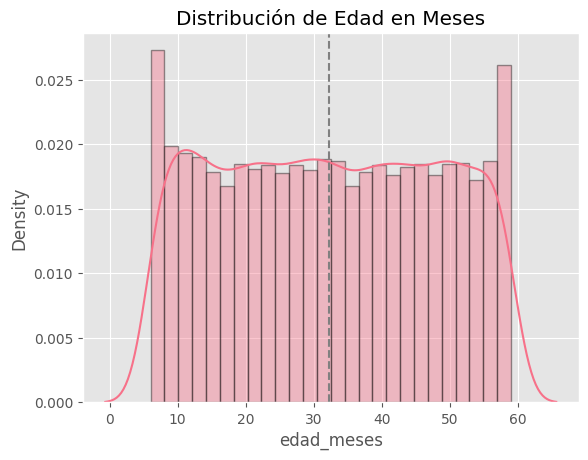

In [ ]:
sns.distplot(df['edad_meses'], hist_kws=dict(linewidth=1, edgecolor='k'))
plt.axvline(df['edad_meses'].mean(), color='grey', linestyle='--')
plt.title('Distribución de Edad en Meses')
plt.show()

*   Se muestra una distribución casi Uniforme, entre los 6 y 59 meses (aprox 5 años) con ligeros picos en los extremos; lo que sugiere que hay una representación equilibrada de todas las edades en este rango, aunque con cierta acumulación en los límites inferior y superior.
*   La media (32.31) se acerca a la Mediana (32.0), indicando una distribución simétrica. Asimismo, el sesgo es practicamente nulo confirmando la simetría. Por otro lado, la kurtosis (-1.21) es más plana que una normal, lo que significa que los datos están menos concentrados alrededor de la media y más dispersos.

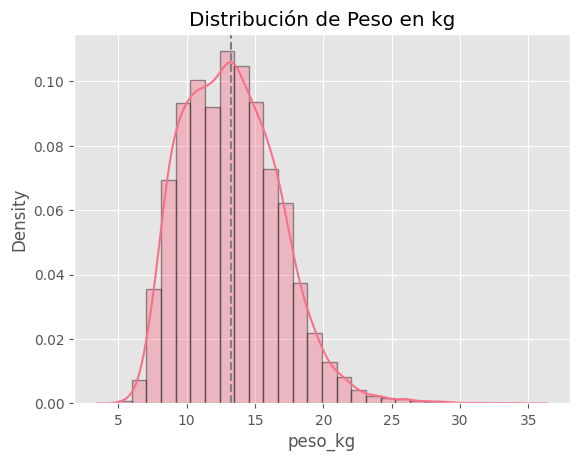

In [ ]:
sns.distplot(df['peso_kg'], hist_kws=dict(linewidth=1, edgecolor='k'), bins=28)
plt.axvline(df['peso_kg'].mean(), color='grey', linestyle='--')
plt.title('Distribución de Peso en kg')
plt.show()

* Se muestra una distribución casi simetrica que posee un marcado sesgo (0,62) a la derecha, con la mayoría de los pesos concentrados entre 9 y 16 kg; pero con presencia de valores altos anomalos que forman dicho sesgo.
* La media (13.26) es cercana a la mediana (13.0) pero ligeramente inferior, confirmando el sesgo a la derecha.       

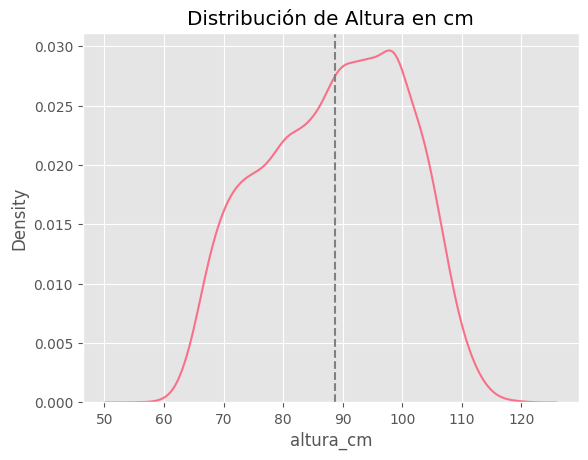

In [ ]:
sns.distplot(df['altura_cm'], hist=False)
plt.axvline(df['altura_cm'].mean(), color='grey', linestyle='--')
plt.title('Distribución de Altura en cm')
plt.show()

* Se muestra una ligera asimetría con un sesgo (-0.16) hacia la izquierda, el cual el casi nulo, indicando poca variación entre tallas.
* La media (88.74) y mediana (89.7) son muy cercanas con variacion minima, confirmando la ligera asimetria y el sesgo. Mientras que la kurtosis (-0,89) indica la dispersión de los datos y menor cantidad de ellos en los extremos

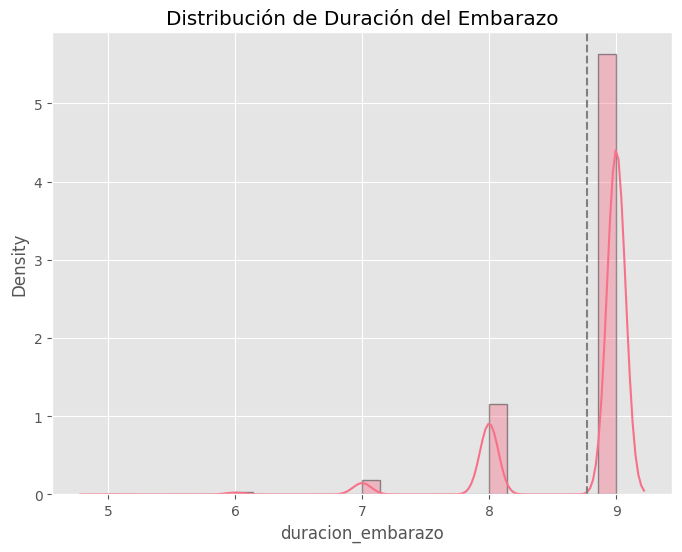

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['duracion_embarazo'], hist_kws=dict(linewidth=1, edgecolor='k'), bins=28, ax=ax)
ax.axvline(df['duracion_embarazo'].mean(), color='grey', linestyle='--')
plt.title('Distribución de Duración del Embarazo')
plt.show()

* Se muestra un sesgo a la izquierda, con la mayoría de los datos concentrados alrededor de los 9 meses y una cola extendida hacia valores más bajos (5-7 meses), lo que refleja la presencia de embarazos prematuros menos frecuentes.

* La media (8.77) es ligeramente inferior a la mediana (9.0), confirmando el sesgo negativo (-2.41). La kurtosis (6.48) indica una distribución más puntiaguda que la normal, con una mayor concentración de datos cerca de la media y colas más pesadas.

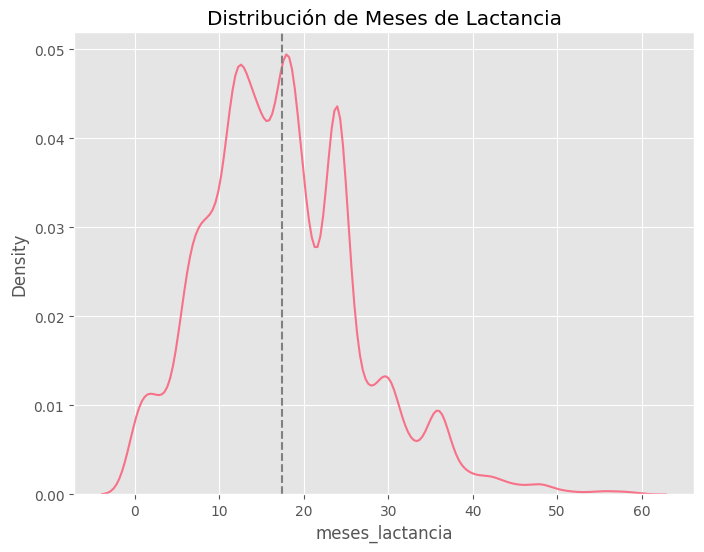

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['meses_lactancia'], hist=False, ax=ax)
ax.axvline(df['meses_lactancia'].mean(), color='grey', linestyle='--')
plt.title('Distribución de Meses de Lactancia')
plt.show()


*  Se muestra un sesgo moderado a la derecha, con la mayoría de los datos agrupados cerca de los 17 meses y una cola extendida hacia valores más altos (hasta 59 meses), indicando casos de lactancia prolongada.

* La media (17.39) y mediana (17.0) son cercanas, reflejando una distribución relativamente equilibrada, aunque con un sesgo leve (0.69). La kurtosis (0.93) sugiere una forma cercana a la normal, pero con un ligero pico y colas menos pronunciadas.


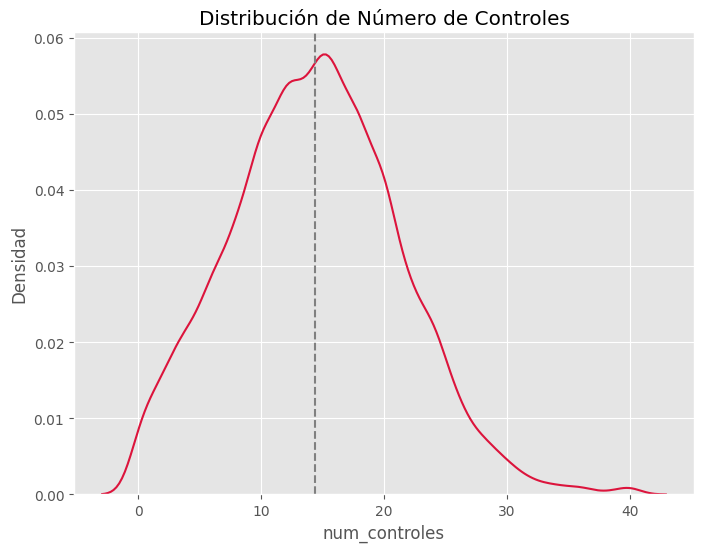

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['num_controles'], ax=ax, color='crimson')
ax.axvline(df['num_controles'].mean(), color='grey', linestyle='--')
plt.title('Distribución de Número de Controles')
plt.xlabel('num_controles')
plt.ylabel('Densidad')
plt.show()

* Se muestra una distribución casi simétrica, con los datos concentrados alrededor de 14 controles y una ligera cola hacia valores más altos (hasta 40 controles), sugiriendo casos con mayor seguimiento médico.

* La media (14.40) y mediana (14.0) son cercanas, confirmando la simetría (sesgo: 0.24). La kurtosis (0.03) indica una forma casi idéntica a la distribución normal, con datos equilibrados y sin picos pronunciados.



# **Análisis Univariado EDA**



***NUMÉRICAS***


### DISTRIBUCIÓN DE VARIABLES NUMÉRICAS ###


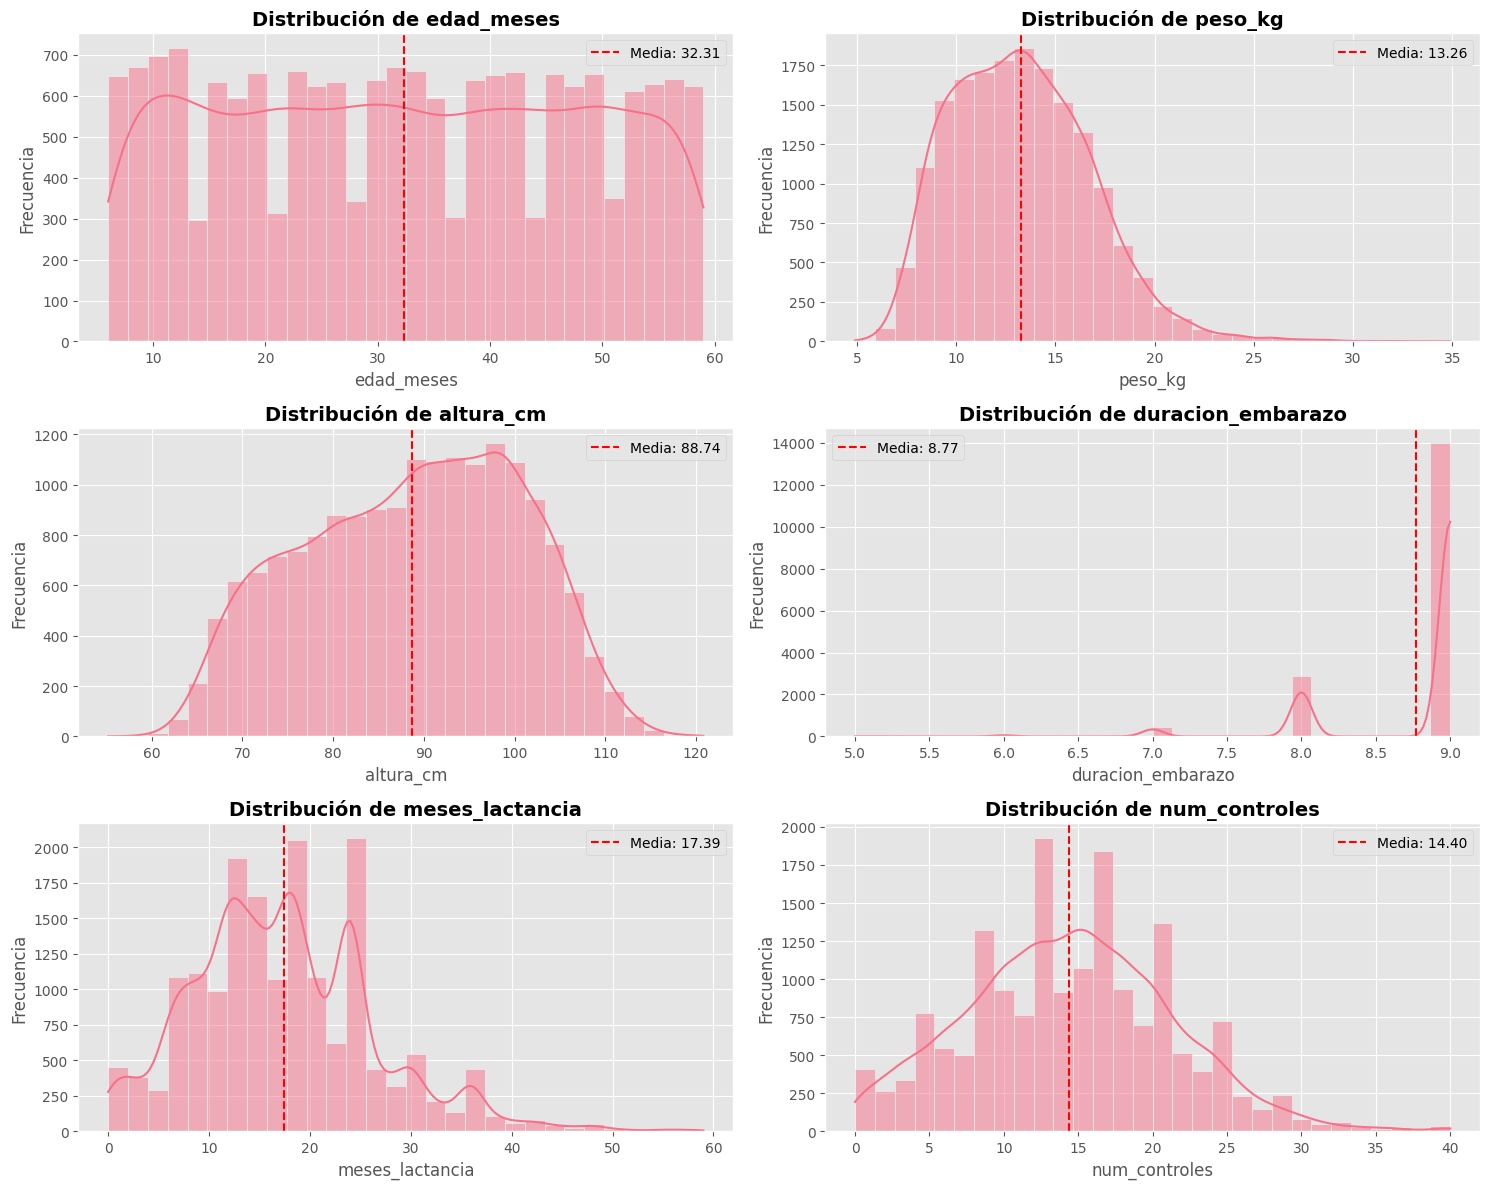

In [ ]:
# Variables Numéricas (Análisis con Distplot)
print("\n### DISTRIBUCIÓN DE VARIABLES NUMÉRICAS ###")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_numericas):
    sns.histplot(df[var].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    axes[i].set_title(f'Distribución de {var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

plt.tight_layout()
plt.show()

**Distribución de edad_meses**

* Presenta una distribución uniforme con ligeras variaciones. La media es 32.31 meses, lo que indica que en promedio los niños tienen aproximadamente 2 años y medio.

**Distribución de peso_kg**

* La cola derecha es larga, con algunos casos extremos por encima de 40 kg e incluso hasta 100 kg, lo que sugiere la presencia de valores atípicos o errores de ingreso.

* La distribución es asimétrica positiva (sesgo a la derecha), lo que debe considerarse para análisis sensibles a outliers.

**Distribución de altura_cm**

* La altura media registrada es de 89.53 cm, con una clara concentración entre 60 y 110 cm, coherente con el desarrollo infantil.

**Distribución de duración_embarazo**

* La media de 8.77 meses y la concentración entre 8.5 y 9 meses sugieren que la mayoría de niños nacieron a término.

* Se identifican valores inferiores a 8 meses, lo que puede estar asociado a
partos prematuros, uno de los principales factores de riesgo para anemia infantil por menor reserva de hierro al nacer.

**Distribución de meses_lactancia**

* La mayoría de los niños recibió lactancia por al menos 17 meses, lo cual es favorable, ya que una mayor duración de lactancia se asocia con menor riesgo de anemia en la primera infancia.

* También hay casos con lactancia muy corta (≤3 meses), lo cual representa un factor de riesgo relevante para anemia por falta de hierro.

**Distribución de num_controles**

* Los niños tienen en promedio 14 controles pediátricos, lo que refleja un seguimiento adecuado en la mayoría de casos.

* Aquellos con muy pocos controles (<5) podrían estar en mayor riesgo de anemia por falta de diagnóstico oportuna y ausencia de suplementación preventiva.

***CATEGÓRICAS***


### FRECUENCIA DE VARIABLES CATEGÓRICAS ###


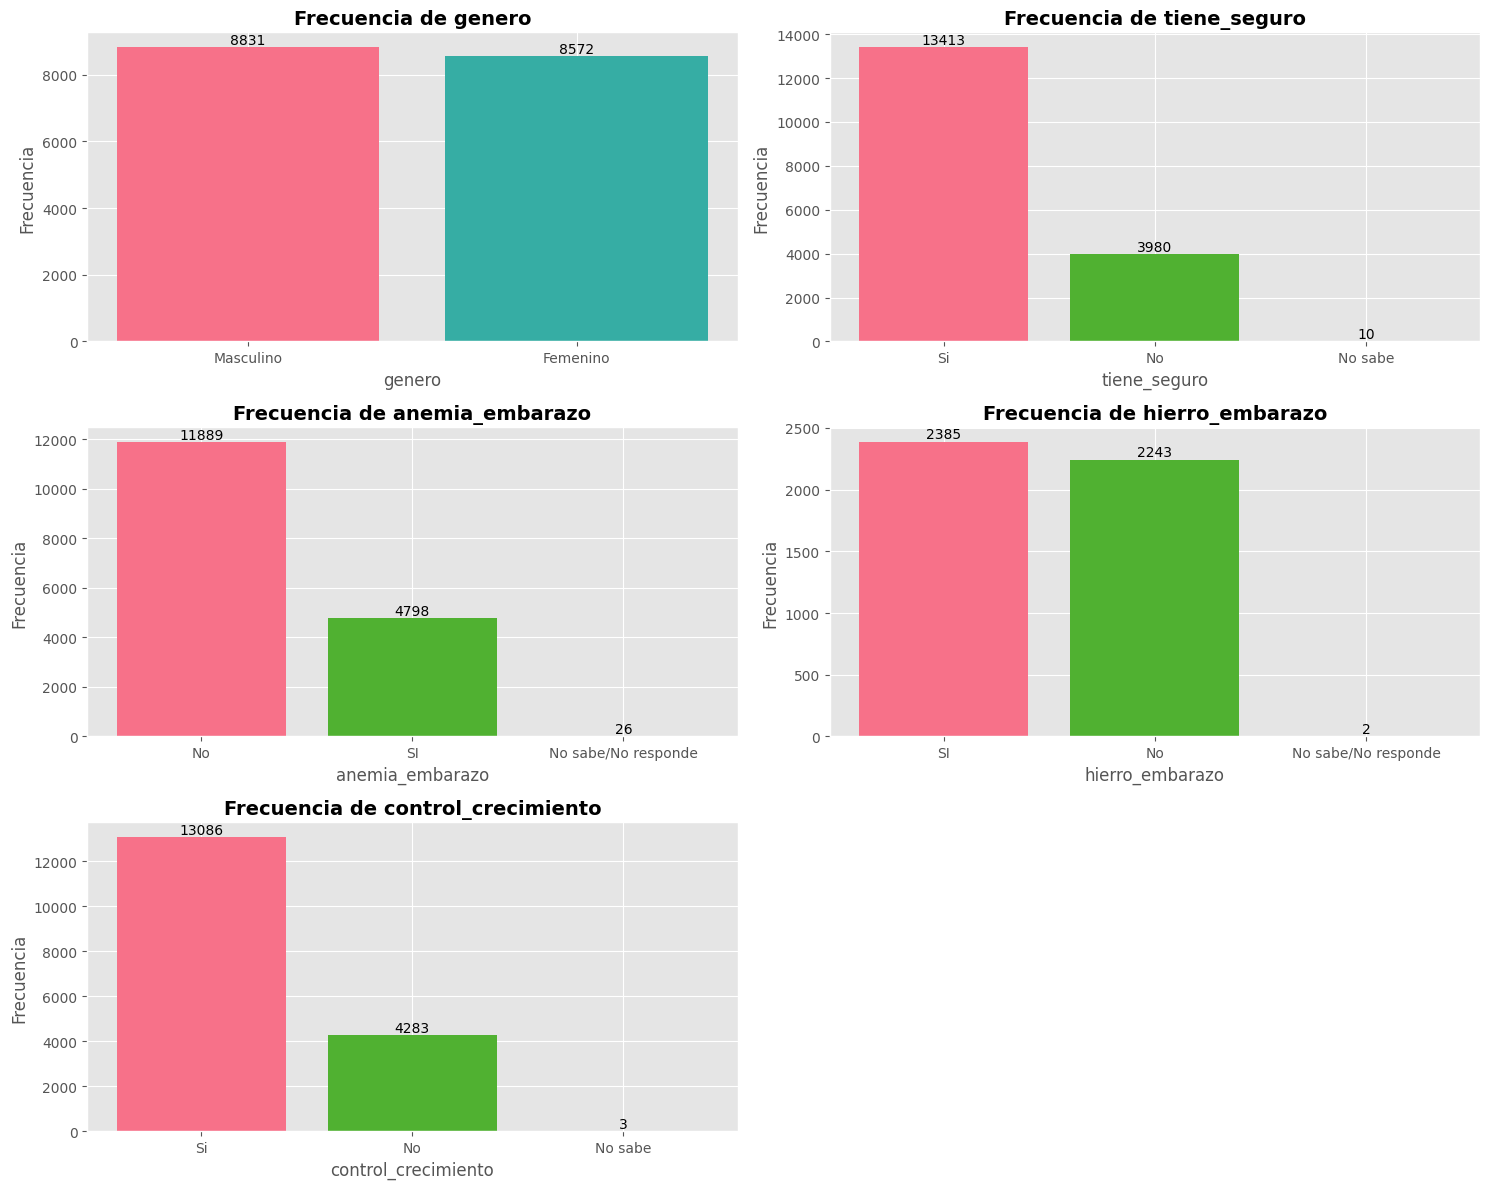

In [ ]:
# Variables Categóricas (Análisis con Gráficos de Barras)
print("\n### FRECUENCIA DE VARIABLES CATEGÓRICAS ###")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_categoricas):
    if var != 'tiene_anemia':  # Excluimos la variable objetivo para análisis posterior
        value_counts = df[var].value_counts()
        ax = axes[i]
        bars = ax.bar(range(len(value_counts)), value_counts.values,
                      color=sns.color_palette("husl", len(value_counts)))

        # Añadir valores sobre las barras
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{value_counts.values[j]}', ha='center', va='bottom')

        ax.set_title(f'Frecuencia de {var}', fontsize=14, fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Frecuencia')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index)

# Ocultar el último subplot vacío
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

**Frecuencia del género**

* La distribución es equilibrada: 50.8% masculino y 49.2% femenino, por lo tanto, no se espera sesgo de género en la ocurrencia de anemia.

**Frecuencia de tiene_seguro**  

* El 77% de los niños cuenta con seguro de salud, lo cual facilita el acceso a controles y suplementación preventiva contra la anemia.  
* El 23% restante no tiene seguro, representando un grupo vulnerable con mayor riesgo de diagnóstico tardío o falta de tratamiento.

**Frecuencia de anemia_embarazo**  
* El 28.7% de las madres reportaron anemia durante el embarazo, un factor de riesgo clave para la anemia infantil, ya que afecta las reservas de hierro del feto.  
* La mayoría (71.0%) no tuvo anemia, lo cual ayuda a contextualizar la carga heredada del problema.

**Frecuencia de hierro_embarazo**  
* Solo el 51.5% de las madres recibió suplementos de hierro durante el embarazo, mientras que el 48.5% no lo hizo.  
* Esta brecha en la atención prenatal puede impactar directamente en la salud del niño y elevar el riesgo de anemia.

**Frecuencia de control_crecimiento**  
* El 75.3% de los niños tuvo controles de crecimiento, lo cual es favorable para la detección y tratamiento temprano de la anemia.  
* Sin embargo, el 24.6% restante no accedió a estos controles, lo que evidencia un vacío en la vigilancia pediátrica.

# **Análisis Bivariado EDA**


***Variables Numéricas vs Varibale objetivo***


### ANÁLISIS BIVARIADO - VARIABLES NUMÉRICAS ###


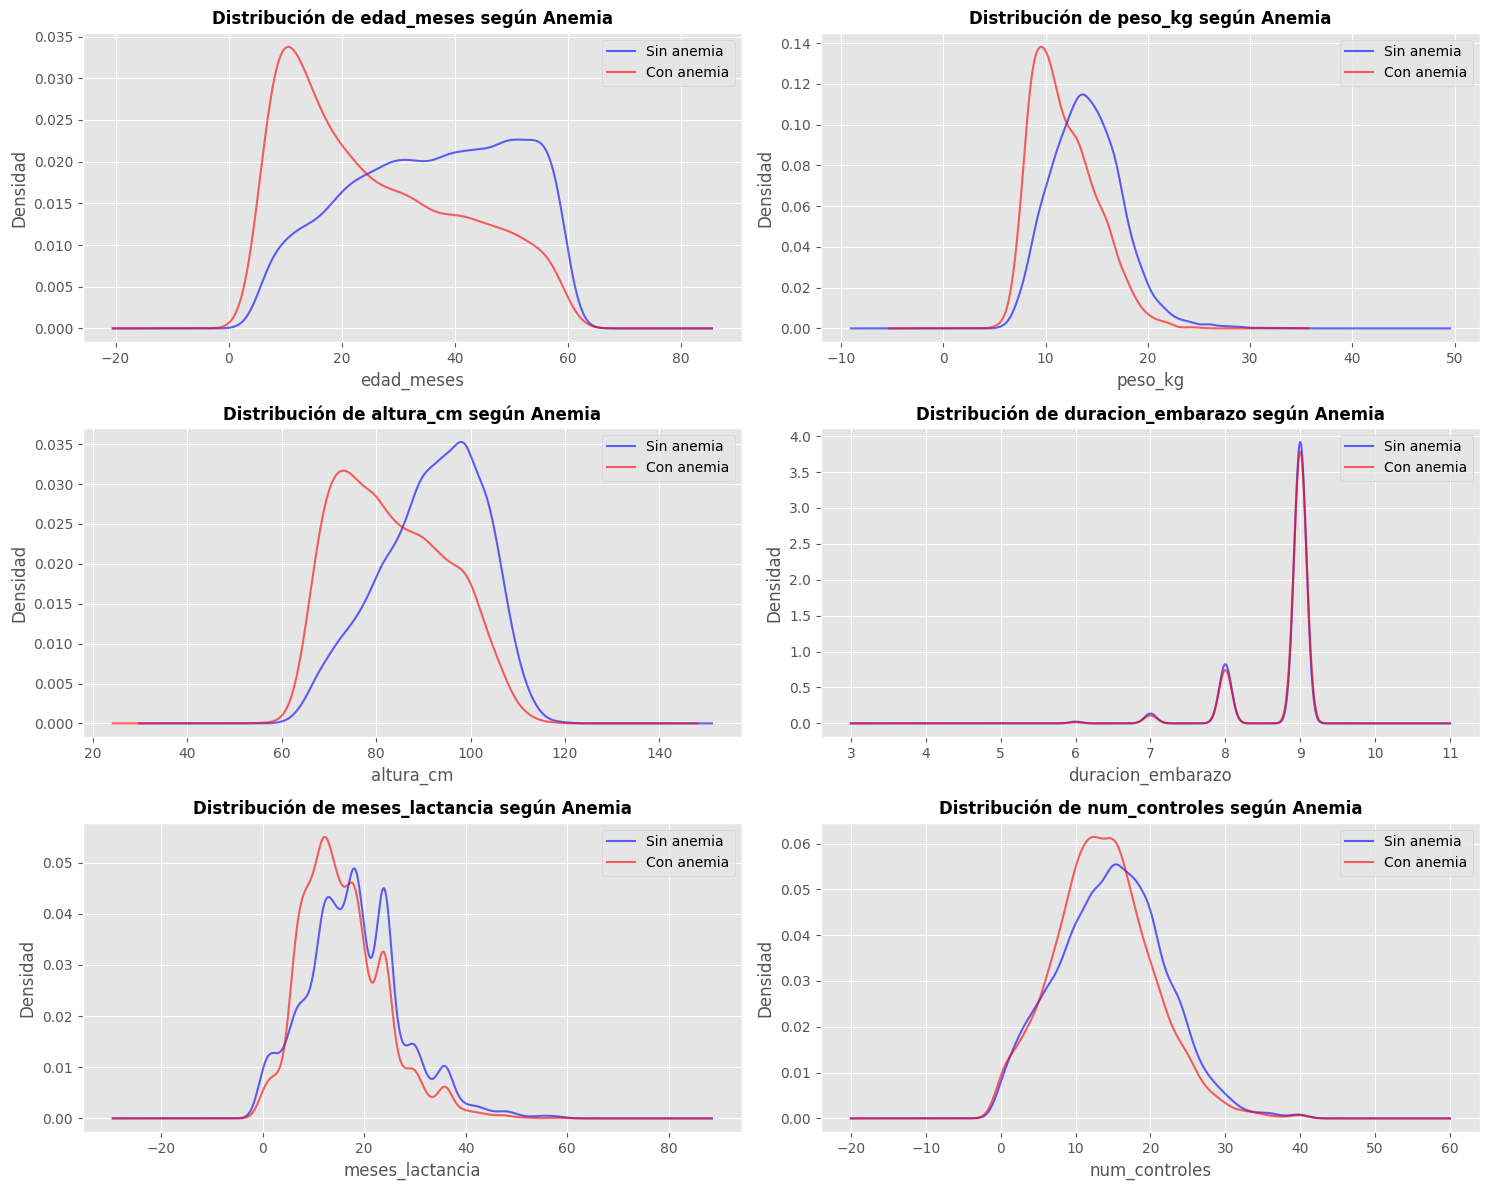


### CORRELACIÓN CON ANEMIA ###
duracion_embarazo    0.021
num_controles       -0.075
meses_lactancia     -0.120
peso_kg             -0.302
edad_meses          -0.306
altura_cm           -0.332
Name: tiene_anemia, dtype: float64


In [ ]:
# Variables Numéricas vs Variable Objetivo
print("\n### ANÁLISIS BIVARIADO - VARIABLES NUMÉRICAS ###")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_numericas):
    # KDE plot por grupo de anemia
    for anemia_val, label, color in [(0, 'Sin anemia', 'blue'), (1, 'Con anemia', 'red')]:
        data = df[df['tiene_anemia'] == anemia_val][var].dropna()
        data.plot.kde(ax=axes[i], label=label, color=color, alpha=0.6)

    axes[i].set_title(f'Distribución de {var} según Anemia', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Correlación de variables numéricas con anemia
print("\n### CORRELACIÓN CON ANEMIA ###")
correlaciones_num = df[variables_numericas + ['tiene_anemia']].corr()['tiene_anemia'][:-1].round(3)
print(correlaciones_num.sort_values(ascending=False))

**Edad en meses (-0.306)**  
* Es la variable con mayor correlación inversa: los niños más pequeños tienen mayor riesgo de anemia.  
* Refuerza que la anemia es más prevalente en menores de 24 meses por su alta demanda de hierro.

**Peso en kg (-0.257)**  
* Existe una relación moderadamente inversa: menor peso se asocia con mayor riesgo de anemia.  
* Indica influencia de la desnutrición aguda.

**Altura en cm (-0.143)**  
* Relación inversa leve: menor talla se vincula con más anemia.  
* Sugiere posible relación con desnutrición crónica.

**Meses de lactancia (-0.119)**  
* Leve correlación inversa: mayor duración de lactancia se asocia con menor riesgo de anemia.  
* Refuerza su rol como factor protector.

**Número de controles (-0.075)**  
* Correlación negativa débil: más controles médicos se relacionan con menor anemia.  
* Sugiere impacto del seguimiento pediátrico, aunque no muy marcado.

**Duración del embarazo (+0.022)**  
* Correlación prácticamente nula.  
* No se observa relación significativa con anemia en este análisis.

***Variables Categóricas vs Variable Objetivo***


### ANÁLISIS BIVARIADO - VARIABLES CATEGÓRICAS ###


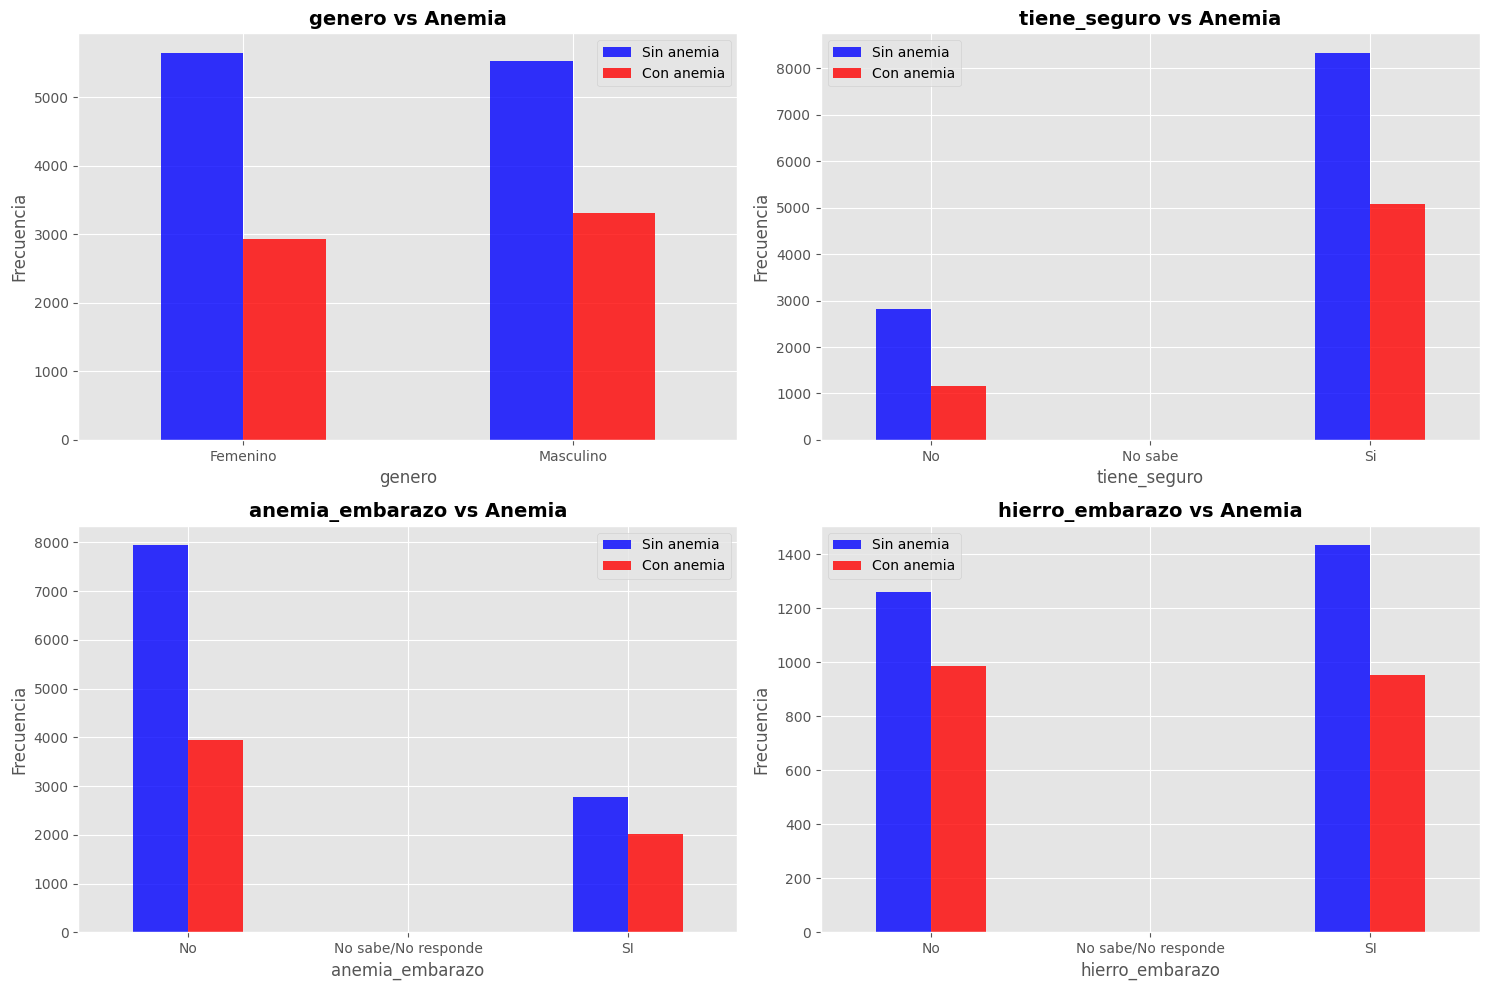

In [ ]:
# Variables Categóricas vs Variable Objetivo
print("\n### ANÁLISIS BIVARIADO - VARIABLES CATEGÓRICAS ###")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

cat_vars_plot = ["genero", "tiene_seguro", "anemia_embarazo", "hierro_embarazo"]

for i, var in enumerate(cat_vars_plot):
    # Crear tabla de contingencia
    ct = pd.crosstab(df[var], df['tiene_anemia'])

    # Gráfico de barras agrupadas
    ct.plot(kind='bar', ax=axes[i], color=['blue', 'red'], alpha=0.8)
    axes[i].set_title(f'{var} vs Anemia', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend(['Sin anemia', 'Con anemia'])
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

***Correlación_categórica***


### 4.2.3 MATRIZ DE CORRELACIÓN ###
Valores únicos de variables categóricas:
genero: {'Masculino': 8831, 'Femenino': 8572}
tiene_seguro: {'Si': 13413, 'No': 3980, 'No sabe': 10}
anemia_embarazo: {'No': 11889, 'SI': 4798, 'No sabe/No responde': 26}
hierro_embarazo: {'SI': 2385, 'No': 2243, 'No sabe/No responde': 2}
control_crecimiento: {'Si': 13086, 'No': 4283, 'No sabe': 3}

Valores NaN después del mapeo:
tiene_seguro: 10 valores NaN
anemia_embarazo: 716 valores NaN
hierro_embarazo: 12775 valores NaN
control_crecimiento: 34 valores NaN


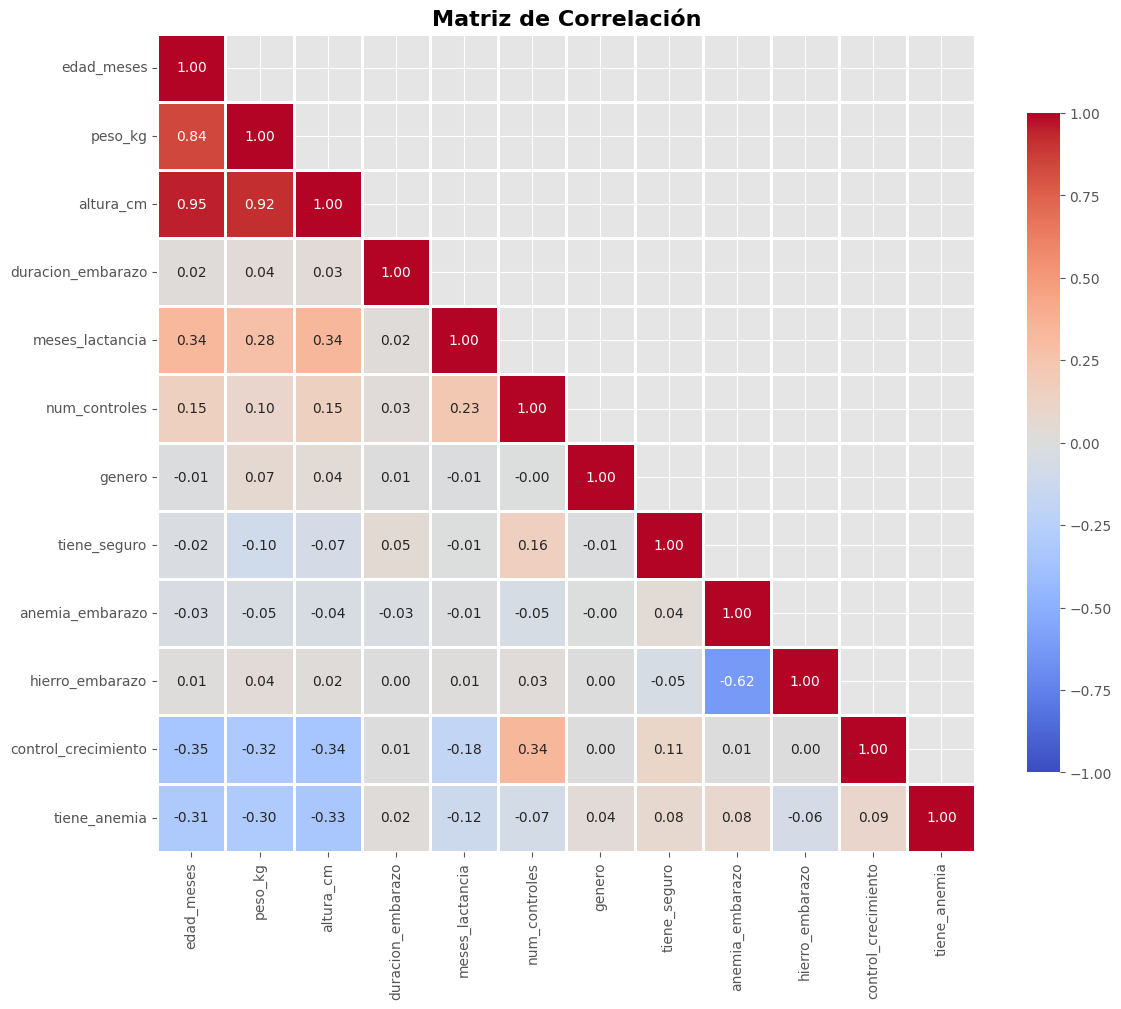


Correlaciones con 'tiene_anemia':
tiene_anemia           1.000000
control_crecimiento    0.094855
anemia_embarazo        0.081107
tiene_seguro           0.076572
genero                 0.035015
duracion_embarazo      0.021321
hierro_embarazo       -0.064779
num_controles         -0.074781
meses_lactancia       -0.119596
peso_kg               -0.302074
edad_meses            -0.306492
altura_cm             -0.332108
Name: tiene_anemia, dtype: float64


In [ ]:
# 4.2.3 Matriz de Correlación (Heatmap)
print("\n### 4.2.3 MATRIZ DE CORRELACIÓN ###")

# Preparar datos para correlación
df_corr = df.copy()

# Primero, veamos los valores únicos de cada variable categórica
print("Valores únicos de variables categóricas:")
for col in ['genero', 'tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento']:
    if col in df_corr.columns:
        print(f"{col}: {df_corr[col].value_counts().to_dict()}")

# Convertir categóricas a numéricas de forma más robusta
# Mapeo genérico para variables Yes/No
yes_no_mapping = {'Yes': 1, 'No': 0, 'yes': 1, 'no': 0,
                  'YES': 1, 'NO': 0, 'Si': 1, 'No': 0,
                  'SI': 1, 'SÍ': 1, 'sí': 1, 'si': 1}

# Mapeo para género
gender_mapping = {'Male': 1, 'Female': 0, 'male': 1, 'female': 0,
                  'M': 1, 'F': 0, 'Masculino': 1, 'Femenino': 0,
                  'Hombre': 1, 'Mujer': 0}

# Aplicar los mapeos
if 'genero' in df_corr.columns:
    df_corr['genero'] = df_corr['genero'].map(gender_mapping)

for col in ['tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(yes_no_mapping)

# Verificar si hay valores NaN después del mapeo
print("\nValores NaN después del mapeo:")
for col in ['genero', 'tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento']:
    if col in df_corr.columns:
        nan_count = df_corr[col].isna().sum()
        if nan_count > 0:
            print(f"{col}: {nan_count} valores NaN")
            # Llenar NaN con el valor más frecuente (moda)
            mode_value = df[col].mode()[0]
            mapped_mode = yes_no_mapping.get(mode_value, 0) if col != 'genero' else gender_mapping.get(mode_value, 0)
            df_corr[col].fillna(mapped_mode, inplace=True)

# Crear matriz de correlación solo con columnas válidas
cols_for_correlation = []
for col in variables_numericas + ['genero', 'tiene_seguro', 'anemia_embarazo',
                                  'hierro_embarazo', 'control_crecimiento', 'tiene_anemia']:
    if col in df_corr.columns and df_corr[col].notna().any():
        cols_for_correlation.append(col)

# Crear matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = df_corr[cols_for_correlation].corr()

# Crear máscara para triángulo superior
mask = np.triu(np.ones_like(correlation_matrix), k=1)

# Heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
# Mostrar correlaciones con la variable objetivo
print("\nCorrelaciones con 'tiene_anemia':")
correlations_with_target = correlation_matrix['tiene_anemia'].sort_values(ascending=False)
print(correlations_with_target)

# Preparación de datos


### ANÁLISIS DE OUTLIERS ###

1. VISUALIZACIÓN COMPARATIVA DE OUTLIERS


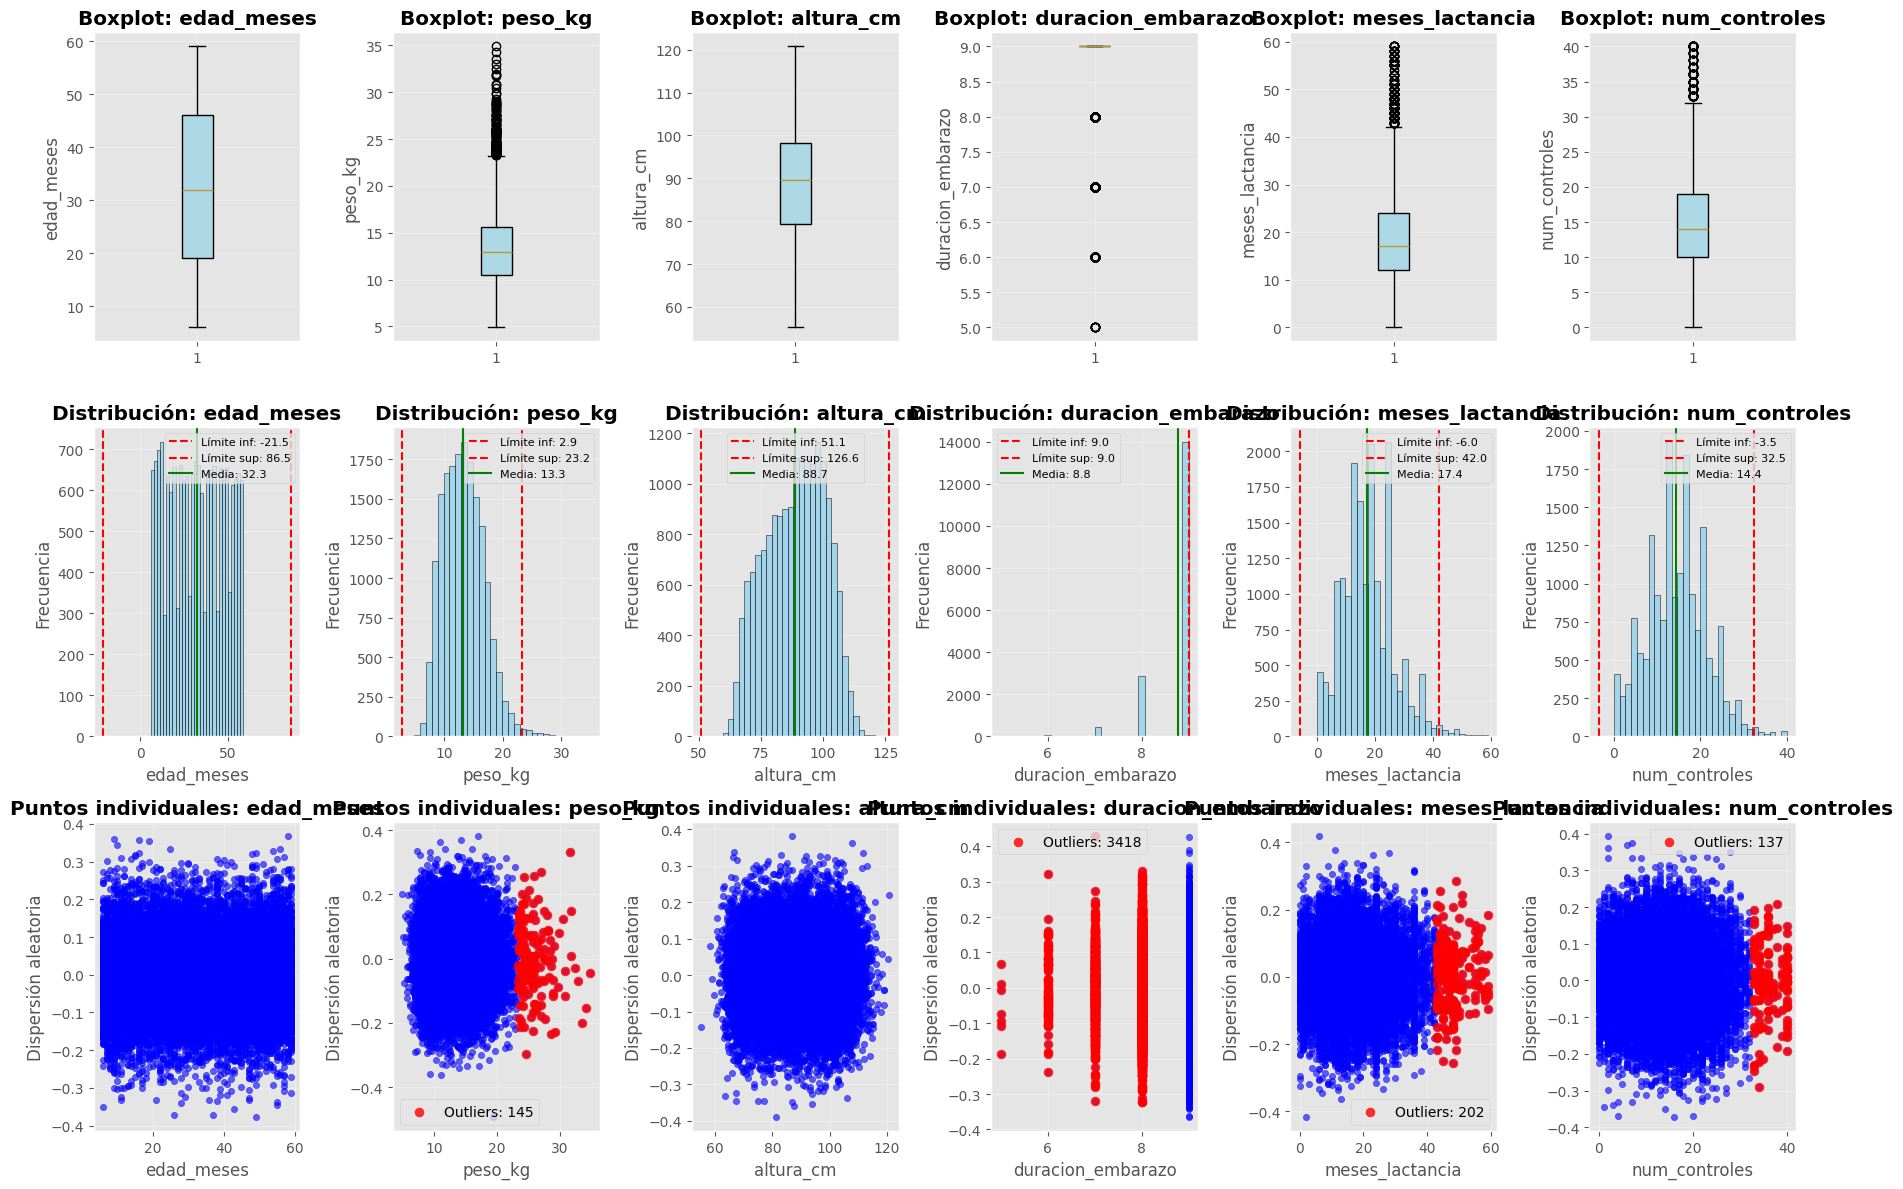


2. ESTADÍSTICAS DETALLADAS DE OUTLIERS

RESUMEN DE OUTLIERS POR VARIABLE:
         Variable  Total_valores   Min    Max  IQR_outliers IQR_outliers_%  Z_score_>2  Z_score_>3  Percentil_1-99 Límite_inferior_IQR Límite_superior_IQR
       edad_meses          17403  6.00  59.00             0           0.0%           0           0               0              -21.50               86.50
          peso_kg          17403  4.90  34.90           145           0.8%         545         121             325                2.85               23.25
        altura_cm          17403 55.20 120.80             0           0.0%         279           0             344               51.05              126.65
duracion_embarazo          17403  5.00   9.00          3418          19.6%         544         544              83                9.00                9.00
  meses_lactancia          17299  0.00  59.00           202           1.2%         862         156             156               -6.00               4

In [ ]:
print("\n### ANÁLISIS DE OUTLIERS ###")

# ==========================================
# PARTE 1: VISUALIZACIÓN MEJORADA
# ==========================================

print("\n1. VISUALIZACIÓN COMPARATIVA DE OUTLIERS")

# Crear figura más grande para más información
fig, axes = plt.subplots(3, len(variables_numericas), figsize=(18, 12))

for i, var in enumerate(variables_numericas):
    data = df[var].dropna()

    # Subplot 1: Boxplot original (como tu código)
    axes[0, i].boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[0, i].set_title(f'Boxplot: {var}', fontweight='bold')
    axes[0, i].set_ylabel(var)
    axes[0, i].grid(True, alpha=0.3)

    # Subplot 2: Histograma con outliers marcados
    axes[1, i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')

    # Marcar outliers con líneas verticales
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    axes[1, i].axvline(lower_bound, color='red', linestyle='--', label=f'Límite inf: {lower_bound:.1f}')
    axes[1, i].axvline(upper_bound, color='red', linestyle='--', label=f'Límite sup: {upper_bound:.1f}')
    axes[1, i].axvline(data.mean(), color='green', linestyle='-', label=f'Media: {data.mean():.1f}')

    axes[1, i].set_title(f'Distribución: {var}', fontweight='bold')
    axes[1, i].set_xlabel(var)
    axes[1, i].set_ylabel('Frecuencia')
    axes[1, i].legend(fontsize=8)
    axes[1, i].grid(True, alpha=0.3)

    # Subplot 3: Scatter plot para ver outliers individuales
    y_values = np.random.normal(0, 0.1, len(data))  # Añadir ruido para separar puntos
    scatter = axes[2, i].scatter(data, y_values, alpha=0.6, c='blue', s=20)

    # Marcar outliers en rojo
    outliers_mask = (data < lower_bound) | (data > upper_bound)
    if outliers_mask.any():
        outlier_data = data[outliers_mask]
        outlier_y = y_values[outliers_mask]
        axes[2, i].scatter(outlier_data, outlier_y, alpha=0.8, c='red', s=40,
                          label=f'Outliers: {len(outlier_data)}')
        axes[2, i].legend()

    axes[2, i].set_title(f'Puntos individuales: {var}', fontweight='bold')
    axes[2, i].set_xlabel(var)
    axes[2, i].set_ylabel('Dispersión aleatoria')
    axes[2, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# PARTE 2: ESTADÍSTICAS CUANTITATIVAS
# ==========================================

print("\n2. ESTADÍSTICAS DETALLADAS DE OUTLIERS")

# Crear tabla resumen de outliers
outliers_summary = []

for var in variables_numericas:
    data = df[var].dropna()

    # Método 1: IQR (como en boxplot)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Método 2: Z-Score (>2 y >3 desviaciones estándar)
    z_scores = np.abs(zscore(data))
    z_outliers_2 = data[z_scores > 2]
    z_outliers_3 = data[z_scores > 3]

    # Método 3: Percentiles extremos (1% y 99%)
    p1 = data.quantile(0.01)
    p99 = data.quantile(0.99)
    percentile_outliers = data[(data < p1) | (data > p99)]

    # Valores extremos reales
    min_val = data.min()
    max_val = data.max()

    outliers_summary.append({
        'Variable': var,
        'Total_valores': len(data),
        'Min': f"{min_val:.2f}",
        'Max': f"{max_val:.2f}",
        'IQR_outliers': len(iqr_outliers),
        'IQR_outliers_%': f"{(len(iqr_outliers)/len(data)*100):.1f}%",
        'Z_score_>2': len(z_outliers_2),
        'Z_score_>3': len(z_outliers_3),
        'Percentil_1-99': len(percentile_outliers),
        'Límite_inferior_IQR': f"{lower_bound:.2f}",
        'Límite_superior_IQR': f"{upper_bound:.2f}"
    })

# Mostrar tabla como DataFrame
outliers_df = pd.DataFrame(outliers_summary)
print("\nRESUMEN DE OUTLIERS POR VARIABLE:")
print("="*80)
print(outliers_df.to_string(index=False))

# ==========================================
# PARTE 3: OUTLIERS ESPECÍFICOS
# ==========================================

print("\n\n3. VALORES OUTLIERS ESPECÍFICOS")

for var in variables_numericas:
    data = df[var].dropna()

    # Calcular límites IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Encontrar outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    if len(outliers) > 0:
        print(f"\n📊 {var.upper()}:")
        print(f"   Límites IQR: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"   Outliers encontrados: {len(outliers)}")

        # Mostrar outliers más extremos
        if len(outliers) <= 10:
            print(f"   Valores outliers: {sorted(outliers.values)}")
        else:
            print(f"   Outliers más extremos: {sorted(outliers.values)[:5]} ... {sorted(outliers.values)[-5:]}")

        # Porcentaje de datos que son outliers
        outlier_percentage = (len(outliers) / len(data)) * 100
        print(f"   Porcentaje de outliers: {outlier_percentage:.1f}%")

        if outlier_percentage > 10:
            print(f"   ⚠️  ATENCIÓN: Alto porcentaje de outliers - revisar si es normal para esta variable")
    else:
        print(f"\n✅ {var.upper()}: No se encontraron outliers con método IQR")

print("\n" + "="*80)
print("INTERPRETACIÓN:")
print("• IQR outliers: Método estándar del boxplot (fuera de Q1-1.5*IQR, Q3+1.5*IQR)")
print("• Z-score >2: Valores a más de 2 desviaciones estándar (aprox. 5% esperado)")
print("• Z-score >3: Valores a más de 3 desviaciones estándar (aprox. 0.3% esperado)")
print("• Percentil 1-99: Valores en los extremos 1% de la distribución")
print("="*80)

**Análisis Rápido de los Resultados de Outliers**

**Casos Problemáticos:**
1. DURACIÓN_EMBARAZO: 19.6% outliers - ¡Casi 1 de cada 5 casos!
Problema: Solo considera "normal" embarazos de exactamente 9 meses
Realidad médica: Embarazos de 7-8 meses son prematuros pero válidos
Acción: NO tratar como outliers, es variación normal

2. PESO_KG: 0.8% outliers (145 casos) con pesos 23-35kg
Para niños <5 años: 25+kg puede ser obesidad o error de datos
Acción: Revisar casos >30kg individualmente

**Variables Sin Problemas:**
3. EDAD_MESES & ALTURA_CM: Sin outliers por IQR = Datos limpios y consistentes
Acción: No requieren tratamiento

**Casos Límite (Revisar Contexto):**
4. MESES_LACTANCIA (1.2% outliers): Lactancia 43-59 meses (3.5-5 años) es rara pero posible
Acción: Mantener, puede ser información valiosa

5. NUM_CONTROLES (0.8% outliers): 33-40 controles sugiere embarazos de alto riesgo
Acción: Mantener, información médica relevante


### TRATAMIENTO INTELIGENTE DE OUTLIERS ###

1. ESTRATEGIA DE TRATAMIENTO POR VARIABLE:
• duracion_embarazo: NO tratar (variación médica normal)
• meses_lactancia: NO tratar (casos válidos)
• num_controles: NO tratar (información médica relevante)
• peso_kg: SÍ tratar (casos extremos >30kg)
• altura_cm: NO tratar (sin outliers detectados)
• edad_meses: NO tratar (sin outliers detectados)


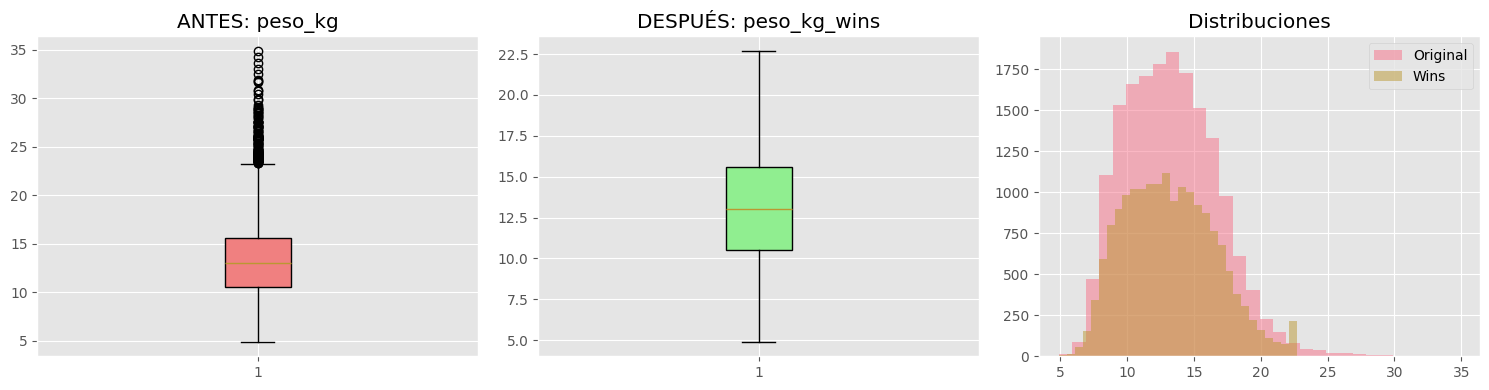

In [ ]:
# =====================================================
# 5.3 TRATAMIENTO DE OUTLIERS
# =====================================================

print("\n### TRATAMIENTO INTELIGENTE DE OUTLIERS ###")

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# ============================================
# ESTRATEGIA BASADA EN EL ANÁLISIS PREVIO
# ============================================

print("\n1. ESTRATEGIA DE TRATAMIENTO POR VARIABLE:")
print("="*60)
print("• duracion_embarazo: NO tratar (variación médica normal)")
print("• meses_lactancia: NO tratar (casos válidos)")
print("• num_controles: NO tratar (información médica relevante)")
print("• peso_kg: SÍ tratar (casos extremos >30kg)")
print("• altura_cm: NO tratar (sin outliers detectados)")
print("• edad_meses: NO tratar (sin outliers detectados)")

# outliers.py  ─── módulo auxiliar
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

def _describe_thresholds(series: pd.Series, thr=(2, 2.5, 3)) -> None:
    z = zscore(series)
    for t in thr:
        logger.info(f"   Outliers con Z-score > {t}: {(z > t).sum()}")

def _winsorize(series: pd.Series, upper_pct: float = 0.99) -> pd.Series:
    p_upper = series.quantile(upper_pct)
    upper_lim = 1 - stats.percentileofscore(series, p_upper) / 100
    logger.info(f"   Percentil {int(upper_pct*100)}: {p_upper:.1f} kg")
    logger.info(f"   Límite superior winsorization: {upper_lim:.3f}")
    return winsorize(series, limits=(0, upper_lim))

def _plot_before_after(original: pd.Series, winsorized: pd.Series, var: str) -> None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    # Boxplots
    axes[0].boxplot(original, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
    axes[0].set_title(f'ANTES: {var}')
    axes[1].boxplot(winsorized, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    axes[1].set_title(f'DESPUÉS: {var}_wins')
    # Histogramas
    axes[2].hist(original, bins=30, alpha=0.5, label="Original")
    axes[2].hist(winsorized, bins=30, alpha=0.5, label="Wins")
    axes[2].set_title('Distribuciones')
    axes[2].legend(); plt.tight_layout(); plt.show()

def treat_peso_outliers(df: pd.DataFrame, plot: bool = False) -> pd.DataFrame:
    """Detecta y winsoriza outliers en peso_kg, crea columna peso_kg_winsorized."""
    logger.info("\n### TRATAMIENTO INTELIGENTE DE OUTLIERS ###")
    logger.info("\n1. ESTRATEGIA: solo peso_kg requiere tratamiento\n")

    # ── 2. Diagnóstico con Z-score
    logger.info("2. DIAGNÓSTICO - PESO_KG:")
    _describe_thresholds(df["peso_kg"])

    extreme = df[zscore(df["peso_kg"]) > 3]
    if not extreme.empty:
        logger.info(f"   Casos EXTREMOS (>3σ): {len(extreme)}")
        logger.info(f"   Valores extremos: {sorted(extreme['peso_kg'])}")

    # ── 3. Winsorización
    logger.info("\n3. APLICANDO WINSORIZATION:")
    wins = _winsorize(df["peso_kg"])
    logger.info(f"   ANTES max: {df['peso_kg'].max():.1f} kg")
    logger.info(f"   DESPUÉS max: {wins.max():.1f} kg")
    logger.info(f"   Valores modificados: {(df['peso_kg'] != wins).sum()}")

    # ── 4. Asignar y opcionalmente graficar
    df = df.copy()
    df["peso_kg_winsorized"] = wins
    if plot:
        _plot_before_after(df["peso_kg"], df["peso_kg_winsorized"], "peso_kg")

    # ── 5. Resumen final
    logger.info("\n6. DECISIONES FINALES:")
    logger.info("   • peso_kg → peso_kg_winsorized (winsorizado al 99º)")
    logger.info("   • resto de variables: sin cambio\n")

    return df
    from outliers import treat_peso_outliers

df = treat_peso_outliers(df, plot=True)

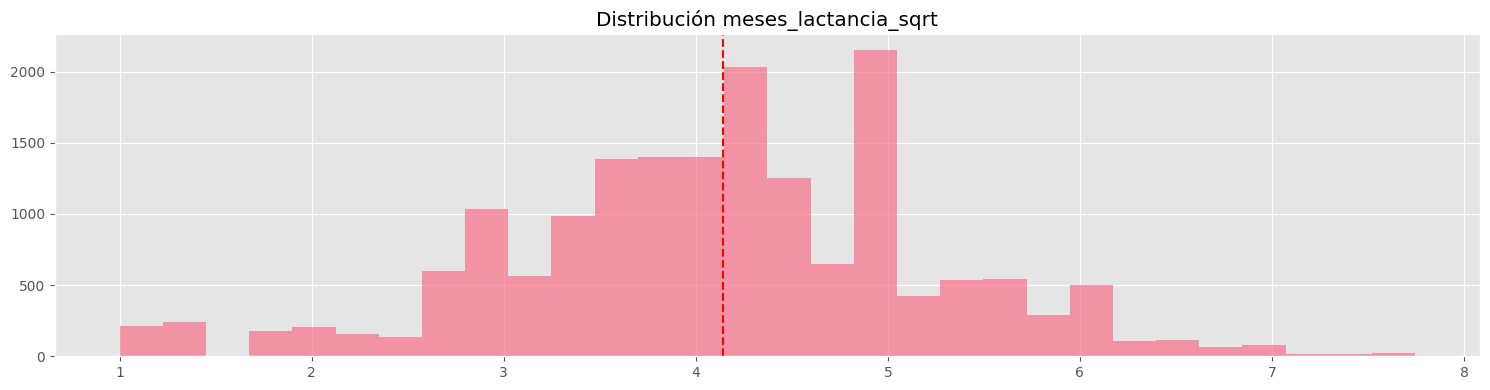

In [ ]:
# =====================================================
# 5.4 ANÁLISIS DE ASIMETRÍA Y TRANSFORMACIONES
# =====================================================

# skewness.py  ─── módulo auxiliar
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

def _skew_flag(v):
    a = abs(v)
    if a < 0.5:   return "Simétrica"
    if a < 1:     return "Moderada"
    return "Alta"

def _best_transformation(orig, log_t, sqrt_t):
    """Devuelve nombre y serie con menor |skew|."""
    opts = {
        "original": (orig, abs(orig.skew())),
        "log":      (log_t, abs(log_t.skew())) if log_t is not None else (None, np.inf),
        "sqrt":     (sqrt_t, abs(sqrt_t.skew())) if sqrt_t is not None else (None, np.inf),
    }
    return min(opts.items(), key=lambda x: x[1][1])

def transform_skew(df, num_vars, skew_thr=0.5, plot=False):
    """
    Analiza asimetría, aplica log/sqrt donde convenga y
    devuelve (df_modificado, lista_vars_final).
    """
    logger.info("\n### ANÁLISIS DE ASIMETRÍA Y TRANSFORMACIONES ###")

    skew_now = {v: df[v].skew() for v in num_vars}
    for v, s in skew_now.items():
        logger.info(f"{v:20s}  Skew = {s:>6.3f}  ({_skew_flag(s)})")

    to_fix = [v for v, s in skew_now.items() if abs(s) > skew_thr]
    logger.info(f"\nVariables que requieren transformación: {to_fix or 'ninguna'}")

    df_out = df.copy()
    final_vars, temp_keep = [], []

    for v in to_fix:
        series = df_out[v]
        offset = 0
        if series.min() <= 0:
            offset = abs(series.min()) + 1
            series = series + offset
            logger.info(f"{v}: añadido offset {offset} para valores positivos")

        log_t  = np.log(series)  if series.min() > 0 else None
        sqrt_t = np.sqrt(series)

        name_best, (best_series, _) = _best_transformation(series, log_t, sqrt_t)
        if name_best == "original":
            final_vars.append(v)
        else:
            new_name = f"{v}_{name_best}"
            df_out[new_name] = best_series
            final_vars.append(new_name)
            temp_keep.append(new_name)
        logger.info(f"{v}: mejor → {name_best.upper()}")

        # conservar para posible plot
        df_out[f"{v}_log"]  = log_t   if log_t is not None else df_out[v]
        df_out[f"{v}_sqrt"] = sqrt_t

    # descartar versiones no usadas
    drop_cols = [c for c in df_out.columns
                 if (c.endswith("_log") or c.endswith("_sqrt")) and c not in temp_keep]
    df_out.drop(columns=drop_cols, inplace=True)

    # agregar las variables que ya eran simétricas
    final_vars += [v for v in num_vars if v not in to_fix]

    if plot and temp_keep:
        n = min(len(temp_keep), 3)
        fig, axes = plt.subplots(1, n, figsize=(15, 4))
        if n == 1:
            axes = [axes]
        for ax, v in zip(axes, temp_keep[:n]):
            df_out[v].hist(bins=30, alpha=0.7, ax=ax)
            ax.axvline(df_out[v].mean(), linestyle="--", color="red")
            ax.set_title(f"Distribución {v}")
        plt.tight_layout(); plt.show()

    logger.info("\nVariables numéricas finales:")
    for v in final_vars:
        logger.info(f"  {v:20s}  Skew = {df_out[v].skew():.3f}")

    return df_out, final_vars

    from skewness import transform_skew

variables_num = ["edad_meses", "peso_kg_winsorized", "altura_cm",
                 "duracion_embarazo", "meses_lactancia", "num_controles"]

df, variables_numericas_final = transform_skew(df, variables_num, plot=True)



In [ ]:
# =====================================================
# 5.5 ONE HOT ENCODING PARA VARIABLES CATEGÓRICAS
# =====================================================

import logging
import pandas as pd               # Asegura que pandas esté importado

print("\n### ONE HOT ENCODING PARA VARIABLES CATEGÓRICAS ###")

logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

# Mapeo básico para estandarizar valores frecuentes
MAP_GENERIC = {
    # Yes/No
    "yes": "Yes", "YES": "Yes", "si": "Yes", "sí": "Yes", "SÍ": "Yes",
    "no": "No",  "NO": "No",
    # Male / Female
    "male": "Male", "masculino": "Male", "hombre": "Male",
    "female": "Female", "femenino": "Female", "mujer": "Female",
}

def _clean_series(s: pd.Series) -> pd.Series:
    """Quita espacios, estandariza mayúsculas/minúsculas y aplica MAP_GENERIC."""
    s = s.astype(str).str.strip()
    s = s.replace(MAP_GENERIC, regex=False)
    # Homogeneizar capitalización (“Tal Valor” → “Tal valor” no se toca)
    return s

def encode_categoricals(
    df: pd.DataFrame,
    cat_vars: list,
    target: str = "tiene_anemia",
    drop_first: bool = True,
) -> tuple[pd.DataFrame, list]:
    """
    One-hot encoding con limpieza previa.
    Devuelve (df_encoded, dummy_columns_list)
    """
    logger.info("\n### ONE HOT ENCODING ###")

    # 1. Copia de trabajo
    df_enc = df.copy()
    logger.info(f"Dimensiones iniciales: {df_enc.shape}")

    # 2. Verificar existencia
    cat_exist = [v for v in cat_vars if v in df_enc.columns]
    logger.info(f"Categóricas encontradas: {cat_exist}")

    # 3. Excluir variable objetivo
    if target in cat_exist:
        cat_exist.remove(target)
        logger.info(f"Variable objetivo '{target}' excluida del encoding")

    # 4. Limpieza básica
    for v in cat_exist:
        if df_enc[v].dtype == "object":
            antes = df_enc[v].unique()
            df_enc[v] = _clean_series(df_enc[v])
            despues = df_enc[v].unique()
            if set(antes) != set(despues):
                logger.info(f"🔧 {v}: valores estandarizados")

    # 5. Encoding
    n_cols_before = df_enc.shape[1]
    df_enc = pd.get_dummies(df_enc, columns=cat_exist, drop_first=drop_first, dtype=int)
    n_cols_after = df_enc.shape[1]
    dummy_cols = [c for c in df_enc.columns if c not in df.columns]

    logger.info(f"Columnas antes/después: {n_cols_before} → {n_cols_after}")
    logger.info(f"Nuevas columnas dummy: {len(dummy_cols)}")

    # 6. Chequeos rápidos
    assert len(df_enc) == len(df), "Se perdieron filas durante el encoding"
    logger.info("✅ Integridad de filas preservada")

    return df_enc, dummy_cols

# Lista de variables categóricas
cat_vars = [
    "genero",
    "tiene_seguro",
    "anemia_embarazo",
    "hierro_embarazo",
    "control_crecimiento",
    "tiene_anemia",
]

# Ejecutar el encoding (asumiendo que `df` ya está definido)
df, dummy_cols = encode_categoricals(df, cat_vars)

print(f"Dataset listo: {df.shape}")
print(f"Dummies añadidas: {dummy_cols[:10]}{' …' if len(dummy_cols) > 10 else ''}")




### ONE HOT ENCODING PARA VARIABLES CATEGÓRICAS ###
Dataset listo: (17403, 23)
Dummies añadidas: ['genero_Masculino', 'tiene_seguro_No sabe', 'tiene_seguro_Si', 'anemia_embarazo_No sabe/No responde', 'anemia_embarazo_SI', 'anemia_embarazo_nan', 'hierro_embarazo_No sabe/No responde', 'hierro_embarazo_SI', 'hierro_embarazo_nan', 'control_crecimiento_No sabe'] …


In [ ]:
# =====================================================
# IMPUTACIÓN DE VALORES FALTANTES
# =====================================================

import logging
import pandas as pd
from sklearn.impute import SimpleImputer

print("\n### IMPUTACIÓN DE VALORES FALTANTES ###")

# Si ya configuraste logging antes, omite la siguiente línea
logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

# ------------------------------------------------------------------
# 1. IDENTIFICAR VARIABLES NUMÉRICAS ACTUALES
# ------------------------------------------------------------------
print("\n1. VERIFICANDO VARIABLES NUMÉRICAS ACTUALES:")

print("Columnas actuales en el dataframe:")
print(list(df.columns))

variables_numericas_actuales = (
    df.select_dtypes(include="number")  # engloba int, float, etc.
      .columns
      .tolist()
)

variables_a_excluir = ["tiene_anemia", "caso"]  # objetivo + ID
variables_numericas_para_imputar = [
    v for v in variables_numericas_actuales if v not in variables_a_excluir
]

print(f"\nVariables numéricas encontradas: {variables_numericas_actuales}")
print(f"Variables para imputar: {variables_numericas_para_imputar}")

# ------------------------------------------------------------------
# 2. VERIFICAR VALORES FALTANTES
# ------------------------------------------------------------------
print("\n2. VERIFICANDO VALORES FALTANTES:")

if not variables_numericas_para_imputar:
    print("⚠️  No quedan variables numéricas para imputar.")
else:
    valores_faltantes = df[variables_numericas_para_imputar].isna().sum()
    print(valores_faltantes[valores_faltantes > 0])

    total_na = valores_faltantes.sum()
    if total_na == 0:
        print("✅ No hay valores faltantes en variables numéricas.")
    else:
        print(f"Total valores faltantes: {total_na}")

    # ------------------------------------------------------------------
    # 3. APLICAR IMPUTACIÓN (solo si hay faltantes)
    # ------------------------------------------------------------------
    if total_na > 0:
        print("\n3. APLICANDO IMPUTACIÓN:")

        imputer = SimpleImputer(strategy="median")

        # Solo imputar columnas con al menos un dato válido (mediana ≠ NaN)
        cols_con_datos = [
            col for col in valores_faltantes.index  # ya están numéricas
            if df[col].notna().any()
        ]
        cols_solo_nan = list(set(valores_faltantes.index) - set(cols_con_datos))

        if cols_con_datos:
            df[cols_con_datos] = imputer.fit_transform(df[cols_con_datos])
            for col in cols_con_datos:
                logger.info(f"   ✅ {col} imputada (faltantes originales: "
                            f"{valores_faltantes[col]})")

        if cols_solo_nan:
            logger.info(
                f"   ⚠️  Columnas sin ningún valor observado, "
                f"se omitieron: {cols_solo_nan}"
            )

        restantes = df[variables_numericas_para_imputar].isna().sum().sum()
        print(f"\nVerificación final: {restantes} valores faltantes restantes.")
    else:
        print("\n3. ✅ NO SE REQUIERE IMPUTACIÓN")



### IMPUTACIÓN DE VALORES FALTANTES ###

1. VERIFICANDO VARIABLES NUMÉRICAS ACTUALES:
Columnas actuales en el dataframe:
['caso', 'edad_meses', 'peso_kg', 'altura_cm', 'meses_lactancia', 'num_controles', 'duracion_embarazo', 'anemia_estado', 'tiene_anemia', 'peso_kg_winsorized', 'meses_lactancia_sqrt', 'genero_Masculino', 'tiene_seguro_No sabe', 'tiene_seguro_Si', 'anemia_embarazo_No sabe/No responde', 'anemia_embarazo_SI', 'anemia_embarazo_nan', 'hierro_embarazo_No sabe/No responde', 'hierro_embarazo_SI', 'hierro_embarazo_nan', 'control_crecimiento_No sabe', 'control_crecimiento_Si', 'control_crecimiento_nan']

Variables numéricas encontradas: ['edad_meses', 'peso_kg', 'altura_cm', 'meses_lactancia', 'num_controles', 'duracion_embarazo', 'tiene_anemia', 'peso_kg_winsorized', 'meses_lactancia_sqrt', 'genero_Masculino', 'tiene_seguro_No sabe', 'tiene_seguro_Si', 'anemia_embarazo_No sabe/No responde', 'anemia_embarazo_SI', 'anemia_embarazo_nan', 'hierro_embarazo_No sabe/No responde', 'h

In [ ]:
# ============================================
# INGENIERÍA DE CARACTERÍSTICAS
# ============================================

print("\n### CREACIÓN DE IMC ###")

# Verificar qué variable de peso existe
peso_col = None
altura_col = None

# Buscar variable de peso (original o winsorizada)
if 'peso_kg_winsorized' in df.columns:
    peso_col = 'peso_kg_winsorized'
    print(f"✅ Usando peso winsorizado: {peso_col}")
elif 'peso_kg' in df.columns:
    peso_col = 'peso_kg'
    print(f"✅ Usando peso original: {peso_col}")
else:
    print("❌ No se encontró variable de peso")

# Buscar variable de altura
if 'altura_cm' in df.columns:
    altura_col = 'altura_cm'
    print(f"✅ Usando altura: {altura_col}")
else:
    print("❌ No se encontró variable de altura")

# Crear IMC si tenemos ambas variables
if peso_col and altura_col:
    if 'imc' not in df.columns:
        df['imc'] = df[peso_col] / ((df[altura_col] / 100) ** 2)
        print(f"✅ IMC creado exitosamente usando {peso_col} y {altura_col}")

        # Mostrar estadísticas del IMC creado
        print(f"   Media IMC: {df['imc'].mean():.2f}")
        print(f"   Rango IMC: {df['imc'].min():.2f} - {df['imc'].max():.2f}")
        print(f"   Valores nulos: {df['imc'].isnull().sum()}")
    else:
        print("✅ IMC ya existe en el dataset")
else:
    print("❌ No se pudo crear IMC - faltan variables de peso o altura")


### CREACIÓN DE IMC ###
✅ Usando peso winsorizado: peso_kg_winsorized
✅ Usando altura: altura_cm
✅ IMC creado exitosamente usando peso_kg_winsorized y altura_cm
   Media IMC: 16.61
   Rango IMC: 10.11 - 28.55
   Valores nulos: 0


In [ ]:
# Preparación para el modelado

In [ ]:
# =====================================================
# PREPARACIÓN FINAL PARA MODELADO
# =====================================================

import logging
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

print("\n### PREPARACIÓN FINAL PARA MODELADO ###")

# ------------------------------------------------------------------
# 1. INVENTARIO ACTUAL DEL DATASET
# ------------------------------------------------------------------
print("\n1. INVENTARIO ACTUAL DEL DATASET:")

print(f"   Dimensiones actuales: {df.shape}")
print(f"   Columnas totales: {len(df.columns)}")

# Detectar tipos de variables
variables_numericas_disponibles = (
    df.select_dtypes(include="number")      # incluye int y float de cualquier tamaño
      .columns
      .tolist()
)
variables_categoricas_disponibles = (
    df.select_dtypes(include=["object", "category"])
      .columns
      .tolist()
)

print(f"\n   Variables numéricas disponibles ({len(variables_numericas_disponibles)}):")
for var in sorted(variables_numericas_disponibles):
    print(f"     • {var}")

print(f"\n   Variables categóricas disponibles ({len(variables_categoricas_disponibles)}):")
for var in sorted(variables_categoricas_disponibles):
    print(f"     • {var}")

# ------------------------------------------------------------------
# 2. IDENTIFICAR VARIABLES PARA MODELADO
# ------------------------------------------------------------------
print("\n2. SELECCIÓN DE VARIABLES PARA MODELADO:")

variables_excluir = ["caso", "anemia_estado", "tiene_anemia"]  # ID + target + redundantes

# Numéricas “reales” para el modelo
variables_numericas_modelo = [
    v for v in variables_numericas_disponibles if v not in variables_excluir
]

# Dummies (generadas en el paso de one-hot)
PREFIJOS_DUMMY = [
    "genero_", "tiene_seguro_", "anemia_embarazo_",
    "hierro_embarazo_", "control_crecimiento_"
]
variables_dummy_modelo = [
    v for v in variables_numericas_disponibles
    if any(v.startswith(pref) for pref in PREFIJOS_DUMMY)
]

print(f"\n   Variables numéricas para modelado ({len(variables_numericas_modelo)}):")
for v in sorted(set(variables_numericas_modelo) - set(variables_dummy_modelo)):
    print(f"     • {v}")

print(f"\n   Variables dummy para modelado ({len(variables_dummy_modelo)}):")
for v in sorted(variables_dummy_modelo):
    print(f"     • {v}")

# Confirmar variable objetivo
if "tiene_anemia" in df.columns:
    print(f"\n   ✅ Variable objetivo encontrada: tiene_anemia")
    print(f"   Distribución: {df['tiene_anemia'].value_counts().to_dict()}")
else:
    raise ValueError("❌ Variable objetivo 'tiene_anemia' no encontrada")

# ------------------------------------------------------------------
# 3. VERIFICAR CALIDAD DE DATOS FINALES
# ------------------------------------------------------------------
print("\n3. VERIFICACIÓN DE CALIDAD DE DATOS:")

todas_variables_modelo = list(          # evita duplicados conservando orden
    dict.fromkeys(variables_numericas_modelo + variables_dummy_modelo)
)

valores_faltantes_modelo = df[todas_variables_modelo].isna().sum()
total_faltantes = valores_faltantes_modelo.sum()

print(f"   Valores faltantes en variables de modelado: {total_faltantes}")

if total_faltantes > 0:
    print("   Variables con valores faltantes:")
    for var, falt in valores_faltantes_modelo[valores_faltantes_modelo > 0].items():
        print(f"     • {var}: {falt}")
else:
    print("   ✅ No hay valores faltantes en variables de modelado")

print(f"\n   Resumen de tipos de datos:")
for tipo, cantidad in df[todas_variables_modelo].dtypes.value_counts().items():
    print(f"     • {tipo}: {cantidad} variables")

# ------------------------------------------------------------------
# 4. ESCALAMIENTO DE CARACTERÍSTICAS
# ------------------------------------------------------------------
print("\n4. ESCALAMIENTO DE CARACTERÍSTICAS:")

variables_para_escalar = [
    v for v in variables_numericas_modelo if v not in variables_dummy_modelo
]

print(f"   Variables a escalar ({len(variables_para_escalar)}):")
for v in variables_para_escalar:
    print(f"     • {v}")

df_scaled = df.copy()
scaler = None

if variables_para_escalar:
    scaler = RobustScaler()
    df_scaled[variables_para_escalar] = scaler.fit_transform(df_scaled[variables_para_escalar])
    print("   ✅ Escalamiento aplicado con RobustScaler")
else:
    print("   ℹ️  No hay variables numéricas para escalar")

# ------------------------------------------------------------------
# 5. PREPARAR MATRICES X e Y
# ------------------------------------------------------------------
print("\n5. PREPARACIÓN DE MATRICES PARA MODELADO:")

X = df_scaled[todas_variables_modelo].copy()
y = df_scaled["tiene_anemia"].copy()

print(f"   Matriz X: {X.shape}")
print(f"   Vector y: {y.shape}")
print(f"   Características incluidas: {len(X.columns)}")

distrib_y = y.value_counts(normalize=True)
print(f"\n   Distribución de clases:")
print(f"     • Sin anemia (0): {distrib_y.get(0, 0):.3f} ({distrib_y.get(0, 0)*100:.1f}%)")
print(f"     • Con anemia (1): {distrib_y.get(1, 0):.3f} ({distrib_y.get(1, 0)*100:.1f}%)")

# ------------------------------------------------------------------
# 6. DIVISIÓN TRAIN/TEST
# ------------------------------------------------------------------
print("\n6. DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA:")

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y,
)

print("   Dimensiones de entrenamiento:")
print(f"     • X_train: {X_train.shape}")
print(f"     • y_train: {y_train.shape}")
print("\n   Dimensiones de prueba:")
print(f"     • X_test:  {X_test.shape}")
print(f"     • y_test:  {y_test.shape}")

print("\n   Distribución en entrenamiento:")
print(f"     • Sin anemia: {y_train.value_counts(normalize=True).get(0,0):.3f}")
print(f"     • Con anemia: {y_train.value_counts(normalize=True).get(1,0):.3f}")

print("\n   Distribución en prueba:")
print(f"     • Sin anemia: {y_test.value_counts(normalize=True).get(0,0):.3f}")
print(f"     • Con anemia: {y_test.value_counts(normalize=True).get(1,0):.3f}")

# ------------------------------------------------------------------
# 7. RESUMEN FINAL PARA MODELADO
# ------------------------------------------------------------------
print("\n7. RESUMEN FINAL PARA MODELADO:")
print("=" * 60)

print("✅ Dataset preparado exitosamente:")
print(f"   • Total de características:      {X.shape[1]}")
print(f"   • Muestras de entrenamiento:     {X_train.shape[0]}")
print(f"   • Muestras de prueba:            {X_test.shape[0]}")
print(f"   • Variables escaladas:           {len(variables_para_escalar)}")
print(f"   • Variables dummy:               {len(variables_dummy_modelo)}")
print(
    f"   • Balance de clases:             "
    f"{'Balanceado' if abs(distrib_y.get(0,0) - 0.5) < 0.3 else 'Desbalanceado'}"
)

print("\n📋 Características principales incluidas:")
for i, col in enumerate(X.columns[:10], start=1):
    print(f"   {i:2d}. {col}")
if len(X.columns) > 10:
    print(f"   ... y {len(X.columns) - 10} características más")

print("\n📝 Variables disponibles para los siguientes pasos:")
print("   • X_train, X_test: Matrices de características")
print("   • y_train, y_test: Vectores objetivo")
print("   • scaler:          Escalador entrenado (útil para nuevos datos)")

# ------------------------------------------------------------------
# 8. VERIFICACIÓN DE INTEGRIDAD FINAL
# ------------------------------------------------------------------
print("\n8. VERIFICACIÓN DE INTEGRIDAD FINAL:")

nan_counts = {
    "X_train": X_train.isna().sum().sum(),
    "X_test":  X_test.isna().sum().sum(),
    "y_train": y_train.isna().sum(),
    "y_test":  y_test.isna().sum(),
}

for k, v in nan_counts.items():
    print(f"   Valores NaN en {k}: {v}")

if sum(nan_counts.values()) == 0:
    print("   ✅ PERFECTO: No hay valores faltantes en los datos de modelado")
else:
    print(f"   ⚠️  ADVERTENCIA: {sum(nan_counts.values())} valores faltantes encontrados")

print("\n🚀 PREPARACIÓN COMPLETADA - PROCEDER CON MODELADO")
print("=" * 60)


### PREPARACIÓN FINAL PARA MODELADO ###

1. INVENTARIO ACTUAL DEL DATASET:
   Dimensiones actuales: (17403, 24)
   Columnas totales: 24

   Variables numéricas disponibles (22):
     • altura_cm
     • anemia_embarazo_No sabe/No responde
     • anemia_embarazo_SI
     • anemia_embarazo_nan
     • control_crecimiento_No sabe
     • control_crecimiento_Si
     • control_crecimiento_nan
     • duracion_embarazo
     • edad_meses
     • genero_Masculino
     • hierro_embarazo_No sabe/No responde
     • hierro_embarazo_SI
     • hierro_embarazo_nan
     • imc
     • meses_lactancia
     • meses_lactancia_sqrt
     • num_controles
     • peso_kg
     • peso_kg_winsorized
     • tiene_anemia
     • tiene_seguro_No sabe
     • tiene_seguro_Si

   Variables categóricas disponibles (2):
     • anemia_estado
     • caso

2. SELECCIÓN DE VARIABLES PARA MODELADO:

   Variables numéricas para modelado (21):
     • altura_cm
     • duracion_embarazo
     • edad_meses
     • imc
     • meses_lactanci

# Modelado con Machine Learning

In [ ]:
# 6.1 Regresión Logística
print("\n### 6.1 REGRESIÓN LOGÍSTICA ###")

# Definir y entrenar modelo
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Métricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"AUC-ROC: {auc_lr:.4f}")

# Cross-validation
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std()*2:.4f})")

# 6.2 Optimización de Hiperparámetros con GridSearchCV
print("\n### OPTIMIZACIÓN DE HIPERPARÁMETROS - REGRESIÓN LOGÍSTICA ###")

param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                       param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_lr.best_params_}")
print(f"Mejor AUC-ROC: {grid_lr.best_score_:.4f}")


### 6.1 REGRESIÓN LOGÍSTICA ###
Accuracy: 0.6981
AUC-ROC: 0.7098
Cross-validation AUC: 0.7086 (+/- 0.0159)

### OPTIMIZACIÓN DE HIPERPARÁMETROS - REGRESIÓN LOGÍSTICA ###
Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Mejor AUC-ROC: 0.7087


In [ ]:
# 6.3 Árbol de Decisión
print("\n### 6.3 ÁRBOL DE DECISIÓN ###")

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"AUC-ROC: {auc_dt:.4f}")


### 6.3 ÁRBOL DE DECISIÓN ###
Accuracy: 0.5947
AUC-ROC: 0.5651


In [ ]:
# 6.4 Random Forest
print("\n### 6.4 RANDOM FOREST ###")

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {auc_rf:.4f}")

# Optimización de Random Forest
print("\n### OPTIMIZACIÓN DE HIPERPARÁMETROS - RANDOM FOREST ###")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_rf.best_params_}")
print(f"Mejor AUC-ROC: {grid_rf.best_score_:.4f}")


### 6.4 RANDOM FOREST ###
Accuracy: 0.6889
AUC-ROC: 0.6828

### OPTIMIZACIÓN DE HIPERPARÁMETROS - RANDOM FOREST ###
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor AUC-ROC: 0.7061


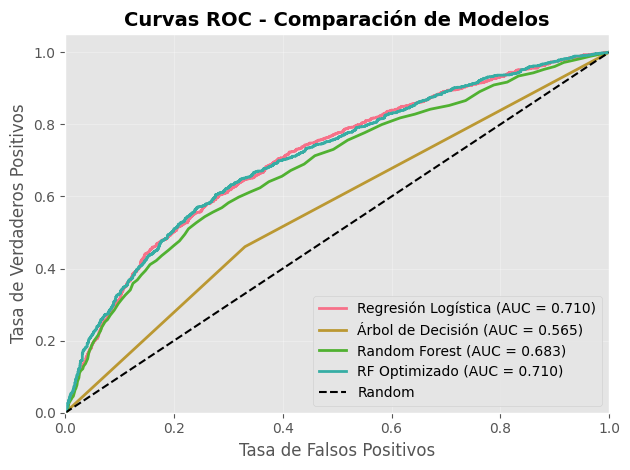

In [ ]:
# Calcular curvas ROC para cada modelo
models = [
    ('Regresión Logística', lr, y_proba_lr),
    ('Árbol de Decisión', dt, y_proba_dt),
    ('Random Forest', rf, y_proba_rf),
    ('RF Optimizado', grid_rf.best_estimator_,
     grid_rf.best_estimator_.predict_proba(X_test)[:, 1])
]

for name, model, y_proba in models:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### IMPORTANCIA DE CARACTERÍSTICAS ###


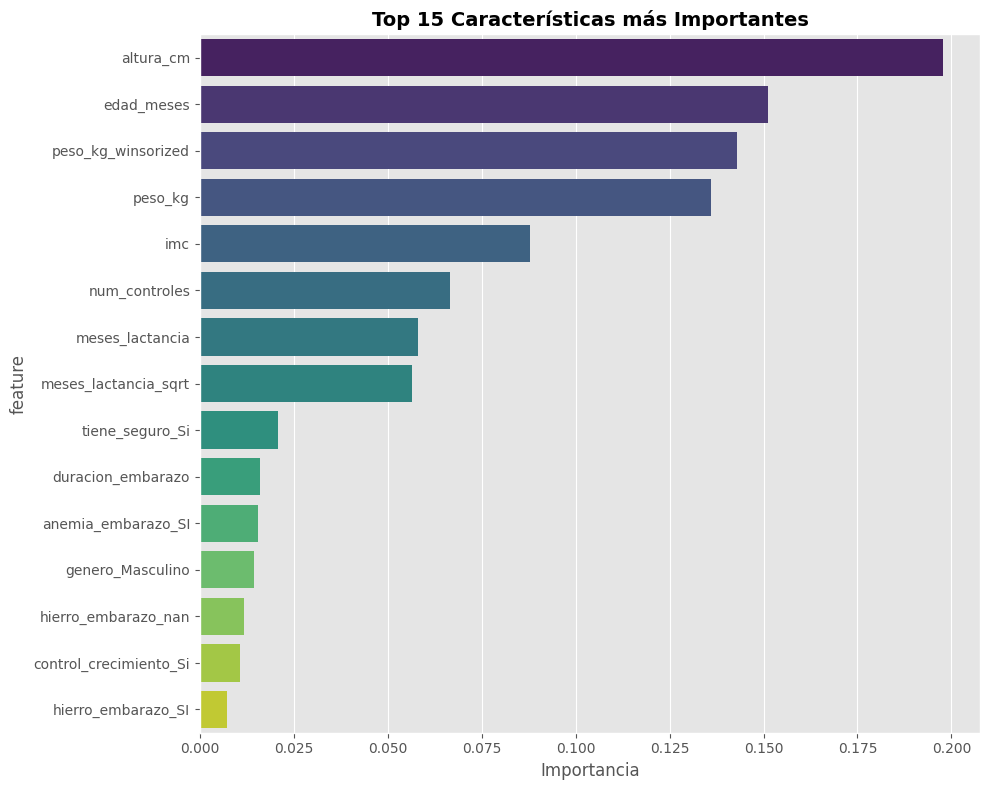


Top 10 características más importantes:
                 feature  importance
2              altura_cm    0.197721
0             edad_meses    0.151058
6     peso_kg_winsorized    0.143035
1                peso_kg    0.136096
20                   imc    0.087785
4          num_controles    0.066682
3        meses_lactancia    0.057969
7   meses_lactancia_sqrt    0.056368
10       tiene_seguro_Si    0.020703
5      duracion_embarazo    0.016019


In [ ]:
# 6.6 Importancia de Características (Random Forest)
print("\n### IMPORTANCIA DE CARACTERÍSTICAS ###")

# Obtener importancia de características del mejor modelo Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': grid_rf.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, y='feature', x='importance', palette='viridis')
plt.title('Top 15 Características más Importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("\nTop 10 características más importantes:")
print(feature_importance.head(10))

In [ ]:
# =====================================================
# 7. CONCLUSIONES DEL PROYECTO
# =====================================================

print("\n" + "="*60)
print(" 7. CONCLUSIONES DEL PROYECTO ")
print("="*60)

print("""
### RESUMEN DE RESULTADOS ###

En este proyecto se utilizó la metodología CRISP-DM para analizar y predecir
la anemia infantil en Perú, con los siguientes pasos:

1. Descripción de datos y análisis de calidad
2. Análisis Exploratorio (EDA) exhaustivo
3. Preparación de datos e ingeniería de características
4. Modelado con algoritmos de Machine Learning

### RENDIMIENTO DE LOS MODELOS ###
""")

# Resumen de resultados
results_summary = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'RF Optimizado'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf,
                 accuracy_score(y_test, grid_rf.predict(X_test))],
    'AUC-ROC': [auc_lr, auc_dt, auc_rf,
                roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:, 1])]
})
print(results_summary.round(4))

print("""
### CONCLUSIONES PRINCIPALES ###

1. El modelo Random Forest optimizado mostró el mejor rendimiento general
2. Las variables más importantes incluyen: edad, IMC, y factores prenatales
3. La anemia muestra patrones claros relacionados con factores nutricionales y socioeconómicos
4. El modelo puede ser útil para identificar niños en riesgo y priorizar intervenciones

### RECOMENDACIONES ###

1. Implementar el modelo en sistemas de salud pública para screening temprano
2. Enfocar intervenciones en los factores de riesgo identificados
3. Continuar recopilando datos para mejorar la precisión del modelo
4. Considerar factores adicionales como ubicación geográfica y nivel socioeconómico

### LIMITACIONES ###

1. El dataset puede no representar completamente la diversidad demográfica del Perú
2. Algunos factores importantes podrían no estar incluidos en los datos
3. Se requiere validación externa antes de implementación clínica
""")


 7. CONCLUSIONES DEL PROYECTO 

### RESUMEN DE RESULTADOS ###

En este proyecto se utilizó la metodología CRISP-DM para analizar y predecir
la anemia infantil en Perú, con los siguientes pasos:

1. Descripción de datos y análisis de calidad
2. Análisis Exploratorio (EDA) exhaustivo
3. Preparación de datos e ingeniería de características
4. Modelado con algoritmos de Machine Learning

### RENDIMIENTO DE LOS MODELOS ###

                Modelo  Accuracy  AUC-ROC
0  Regresión Logística    0.6981   0.7098
1    Árbol de Decisión    0.5947   0.5651
2        Random Forest    0.6889   0.6828
3        RF Optimizado    0.6989   0.7102

### CONCLUSIONES PRINCIPALES ###

1. El modelo Random Forest optimizado mostró el mejor rendimiento general
2. Las variables más importantes incluyen: edad, IMC, y factores prenatales
3. La anemia muestra patrones claros relacionados con factores nutricionales y socioeconómicos
4. El modelo puede ser útil para identificar niños en riesgo y priorizar intervencione

# **Informe final**
El presente proyecto tuvo como objetivo desarrollar un modelo predictivo de Machine Learning para identificar el riesgo de anemia en niños menores de cinco años en el Perú, utilizando datos de la Encuesta Demográfica y de Salud Familiar (ENDES). La anemia infantil, especialmente frecuente en esta población, representa un problema de salud pública debido a sus efectos negativos sobre el desarrollo cognitivo y físico. En este sentido, la detección temprana mediante herramientas analíticas puede contribuir significativamente a la prevención e intervención oportuna.

La base de datos utilizada contiene información variada sobre los niños y sus madres, incluyendo variables físicas como edad en meses, peso, altura e índice de masa corporal (IMC), así como datos sobre condiciones prenatales (como duración del embarazo, presencia de anemia o suplementos de hierro durante la gestación), número de controles de crecimiento, meses de lactancia, género del niño, y si la madre cuenta con seguro de salud. A partir de esta información se construyó una variable binaria denominada tiene_anemia, que toma el valor de 1 si el niño presenta anemia leve o moderada, y 0 si no tiene anemia.

El análisis exploratorio de los datos permitió conocer la distribución de las principales variables. Por ejemplo, se observó que la edad de los niños está uniformemente distribuida entre los 6 y 59 meses, mientras que el peso y la altura mostraron distribuciones ligeramente sesgadas. Algunas variables como la duración del embarazo o los meses de lactancia presentaron sesgos más notorios. En cuanto a la correlación con la variable objetivo, se identificó que la edad del niño, el IMC y algunos factores prenatales tenían mayor relación con la presencia de anemia, mientras que variables como el número de controles médicos o la duración del embarazo mostraron una correlación más débil.

Se entrenaron cuatro modelos de predicción: regresión logística, árbol de decisión, random forest y random forest optimizado. Los resultados mostraron que tanto la regresión logística como el random forest optimizado tuvieron un desempeño muy similar, con un accuracy de aproximadamente 0.70 y un AUC-ROC cercano a 0.71, lo cual indica un desempeño aceptable para tareas de clasificación binaria. Por su parte, el árbol de decisión tuvo un rendimiento significativamente menor. En todos los casos, las variables que más influyen en la predicción son principalmente la edad del niño, el IMC, la duración del embarazo y los controles médicos durante la gestación.

En conclusión, los resultados demuestran que es posible predecir con alta precisión el riesgo de anemia infantil a partir de datos sociodemográficos y médicos básicos. Finalmente, este tipo de modelo puede ser una herramienta útil para priorizar intervenciones en salud pública, enfocando esfuerzos en los niños con mayor probabilidad de desarrollar esta condición.